## Fig.3 Integrating Brain Cell Atlas data to explore the existence of adult hippocampal neurogenesis 

## Load

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore")

#from SCCAF import *
#import scvi

from glob import iglob
from tqdm import tqdm
import scanpy as sc

In [ ]:
import pandas as pd
import seaborn as sns

In [3]:
import pickle

In [4]:
from glob import iglob 

In [5]:
from scipy.stats import median_abs_deviation

In [6]:
from scAnnot.tools import *

In [50]:
import matplotlib as mpl
sc.set_figure_params(scanpy=True, fontsize=14,facecolor=None,frameon=False,transparent=True)
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

# Read in

In [17]:
with open(f'data/hip_integration.pickle', 'rb') as handle:
    ad=pickle.load(handle)

In [18]:
ad.X=ad.X.todense()

In [19]:
label={
'Oligodendrocytes':'Oligodendrocyte', 
'Granule':'Glutamatergic', 
'Astrocytes':'Astrocyte', 
'OPC':'Oligodendrocyte precursor',
'Neuroblast':'Neuroblast', 
'GABA':'GABAergic', 
'ImGranule':'Immature Glutamatergic', 
'CA neurons':'CA neurons',
'Endothelial':'Endothelial', 
'NFOL':'Newly formed oligodendrocyte', 
'NPC':'Neural progenitor'
}

In [20]:
ad.obs['anno1'] = ad.obs['anno'].replace(label)

In [12]:
study={'Hochgerner2018':'Hochgerner et al.', 
       'Zhong2020':'Zhong et al.', 
       'Yi2022': 'Zhou et al.', 
       'Tran2021': 'Tran et al.', 
       'Fatma2020':'Ayhan et al.', 
       'Franjic2021':'Franjic et al.'}
ad.obs['study']=ad.obs['study'].replace(study)

In [ ]:
ad.obs['study'].value_counts()

# Sample info

In [47]:
my_dict = {'Hochgerner et al.': 24185, 'Zhong et al.': 33128, 'Zhou et al.': 69873,'Tran et al.': 10268, 'Ayhan et al.': 122032, 'Franjic et al.': 191611}
df = pd.DataFrame(list(my_dict.items()), columns=['Study', 'Cell number'])

In [48]:
df

Study  Cell number
0  Hochgerner et al.        24185
1       Zhong et al.        33128
2        Zhou et al.        69873
3        Tran et al.        10268
4       Ayhan et al.       122032
5     Franjic et al.       191611

In [49]:
df['Cell number'].sum()

451097

In [13]:
import matplotlib.ticker as ticker

In [14]:
from matplotlib.ticker import LogFormatterSciNotation

In [41]:
mpl.rcParams['axes.spines.top'] = True

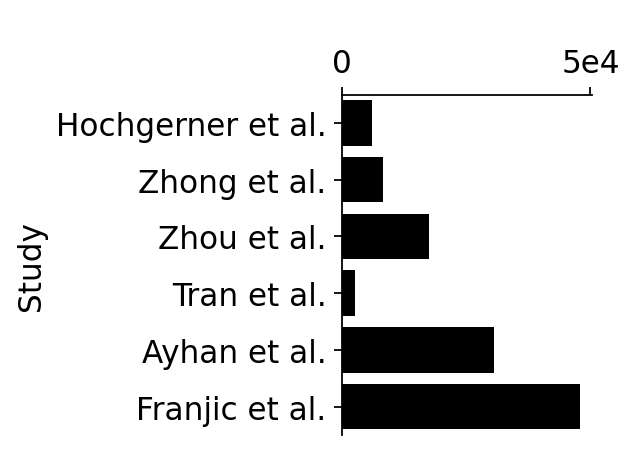

In [52]:
figsize(2,2.8)
sns.barplot(x="Cell number", y="Study", data=df, color='black')

# Show the plot
sns.despine(bottom=True,top=False)
ax = plt.gca()
# Move x-axis to the top
ax.xaxis.tick_top()
# Move x-axis label to the top
ax.xaxis.set_label_position('top')
# Set the tick labels
ax.set_xticklabels(['0', '5e4', '10e4', '15e4', '20e4'])
#ax.set_title('Cell number', loc='right') 
ax.set_xlabel(' ')
#plt.gca().set_xticks([1E2,3E2,1E3,3E3,1E4,3E4,1E5])
#plt.gca().xaxis.set_major_formatter(LogFormatterSciNotation(base=10,minor_thresholds=(10,10)))
#plt.ticklabel_format(axis='x', style='sci', scilimits=(4,4))
#plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:1.0e}'.format(x)))
plt.savefig('figures/fig4/study_cellnumber.pdf',dpi=300, bbox_inches='tight',transparent=True)

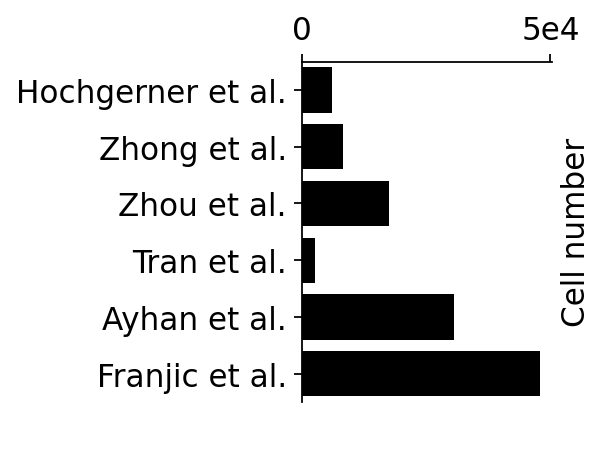

In [54]:
figsize(2,2.8)
sns.barplot(x="Cell number", y="Study", data=df, color='black')

# Show the plot
sns.despine(bottom=True,top=False)
ax = plt.gca()
# Move x-axis to the top
ax.xaxis.tick_top()
# Move x-axis label to the top
ax.yaxis.set_label_position('right')
# Set the tick labels
ax.set_xticklabels(['0', '5e4', '10e4', '15e4', '20e4'])
#ax.set_title('Cell number', loc='right') 
ax.set_ylabel('Cell number')
ax.set_xlabel(' ')
#plt.gca().set_xticks([1E2,3E2,1E3,3E3,1E4,3E4,1E5])
#plt.gca().xaxis.set_major_formatter(LogFormatterSciNotation(base=10,minor_thresholds=(10,10)))
#plt.ticklabel_format(axis='x', style='sci', scilimits=(4,4))
#plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:1.0e}'.format(x)))
plt.savefig('figures/fig4/study_cellnumber1.pdf',dpi=300, bbox_inches='tight',transparent=True)

## UMAPs

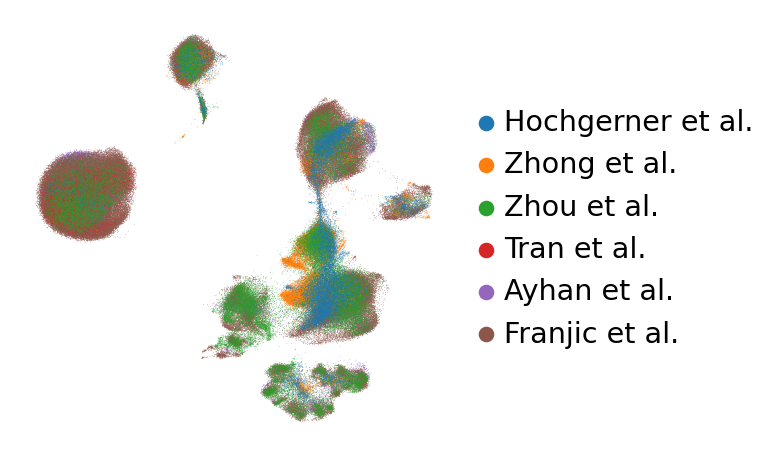

In [62]:
figsize(3.5,3.5)
sc.pl.umap(ad,color=['study'],frameon=False,title='',save='fig4a_umap.pdf')

In [133]:
group={'Hochgerner2018':'Mouse_Hochgerner et al.', 
       'Zhong2020':'Fetus_Zhong et al.', 
       'Infant_Yi2022':'Infant_Zhou et al.', 
       'Child_Yi2022':'Child_Zhou et al.', 
       'Yi2022':'Adult_Zhou et al.', 
       'Tran2021':'Adult_Tran et al.', 
       'Fatma2020':'Adult_Ayhan et al.', 
       'Franjic2021':'Adult_Franjic et al.'}

In [ ]:
ad.obs['group1']=ad.obs.group.replace(group)

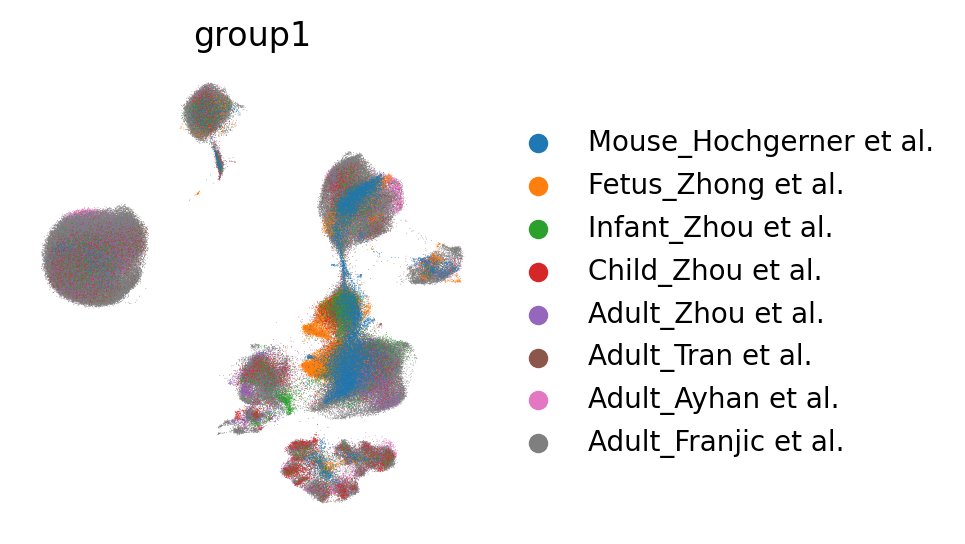

In [ ]:
sc.pl.umap(ad,color='group1',frameon=False)

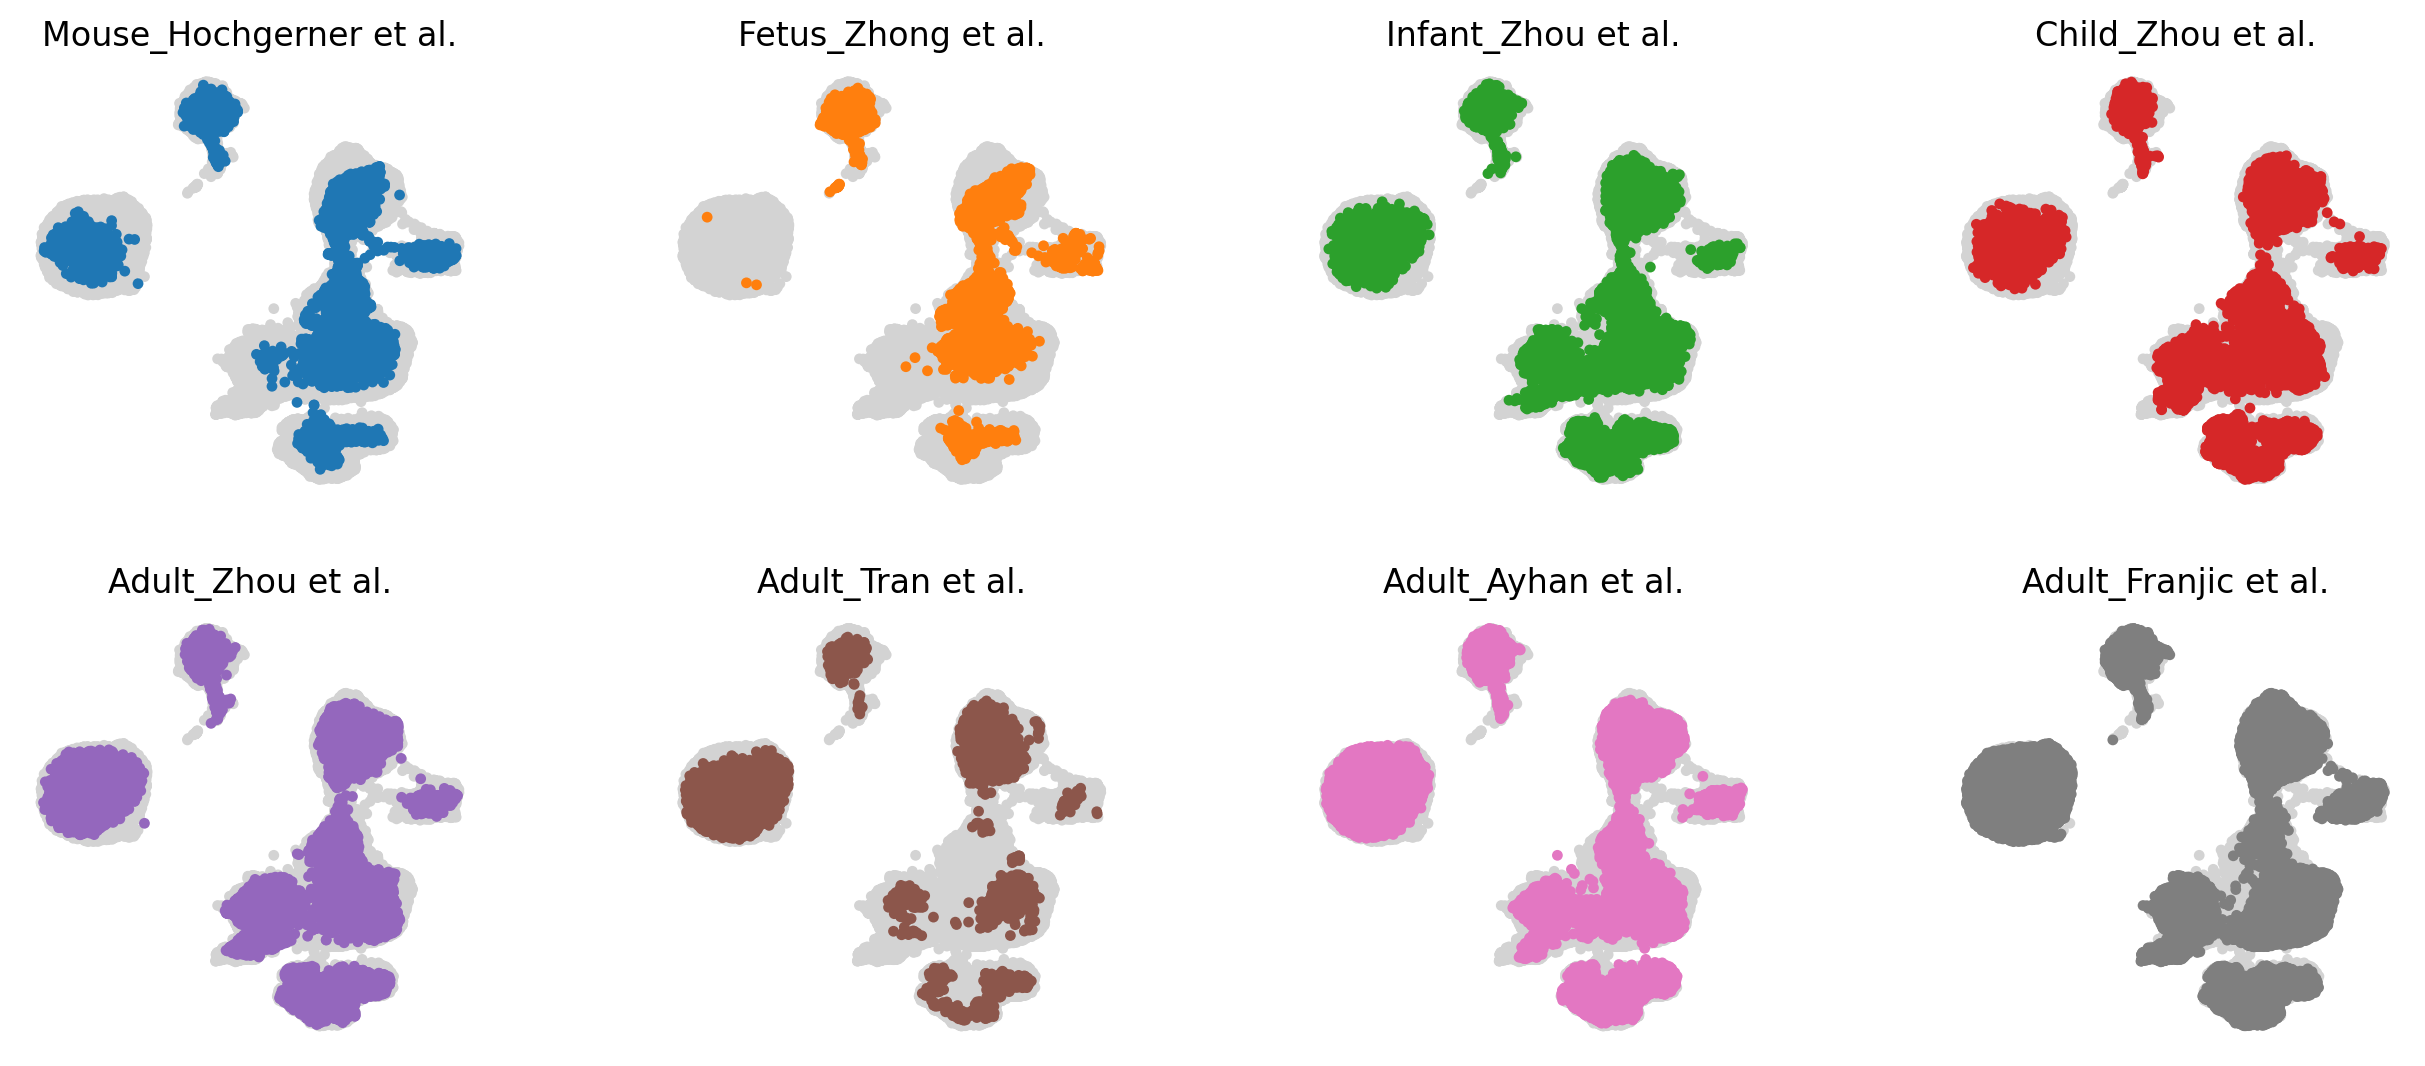

In [ ]:
cluster_small_multiples(ad,'group1')

In [12]:
cm={'NPC': '#DD6091',
 'Neuroblast': '#FFB6C1',
 'ImGranule': '#D9C566',
 'Granule': '#FF8011',
 'CA neurons': '#9440F3',
 'GABA': '#E30B5C',
 'Astrocytes': '#AFE1AF',
 'Endothelial': '#53D385',
 'OPC': '#006091',
 'NFOL': '#74caff',
 'Oligodendrocyte': '#5C89CC'}

In [13]:
cm.values()

dict_values(['#DD6091', '#FFB6C1', '#D9C566', '#FF8011', '#9440F3', '#E30B5C', '#AFE1AF', '#53D385', '#006091', '#74caff', '#5C89CC'])

In [64]:
ad.uns['anno1_colors']=list(cm.values())

In [65]:
ad.obs.anno1.cat.categories

Index(['Neural progenitor', 'Neuroblast', 'Immature Glutamatergic',
       'Glutamatergic', 'CA neurons', 'GABAergic', 'Astrocyte', 'Endothelial',
       'Oligodendrocyte precursor', 'Newly formed oligodendrocyte',
       'Oligodendrocyte'],
      dtype='object')

### anotated celltypes

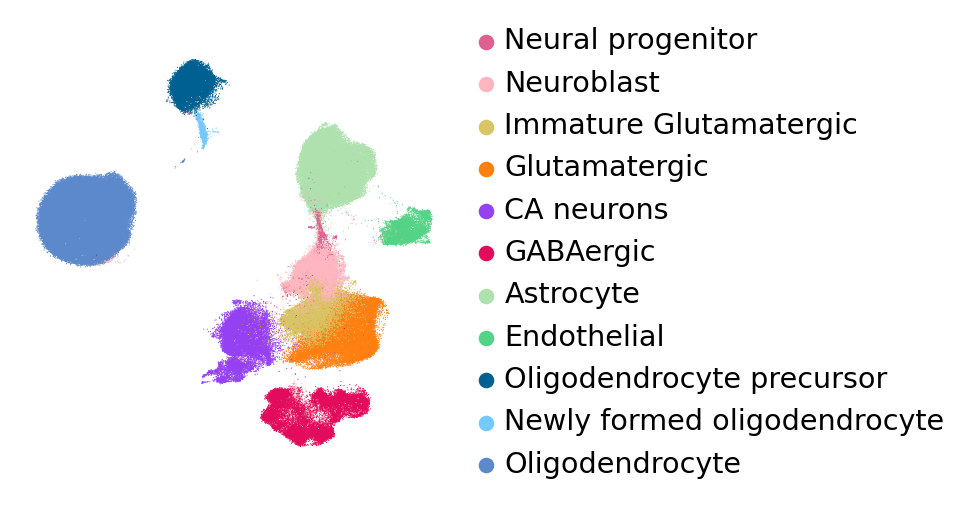

In [66]:
figsize(3.5,3.5)
sc.pl.umap(ad,color=['anno1'],frameon=False,title='',size=1,save='fig4_anno_umap_2.pdf')

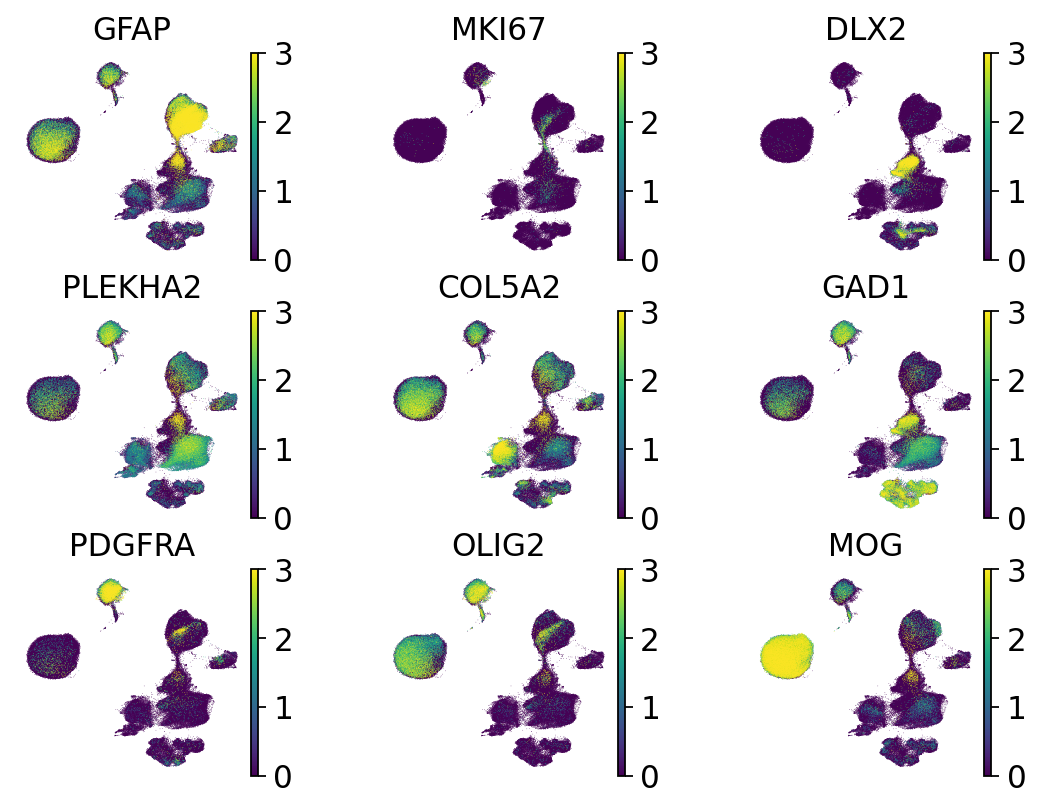

In [15]:
figsize(1.8,1.8)
sc.pl.umap(ad, color=['GFAP','MKI67','DLX2','PLEKHA2','COL5A2','GAD1','PDGFRA','OLIG2','MOG'], ncols=3,vmax=3, frameon=False,save='fig4_maker_umap.pdf')

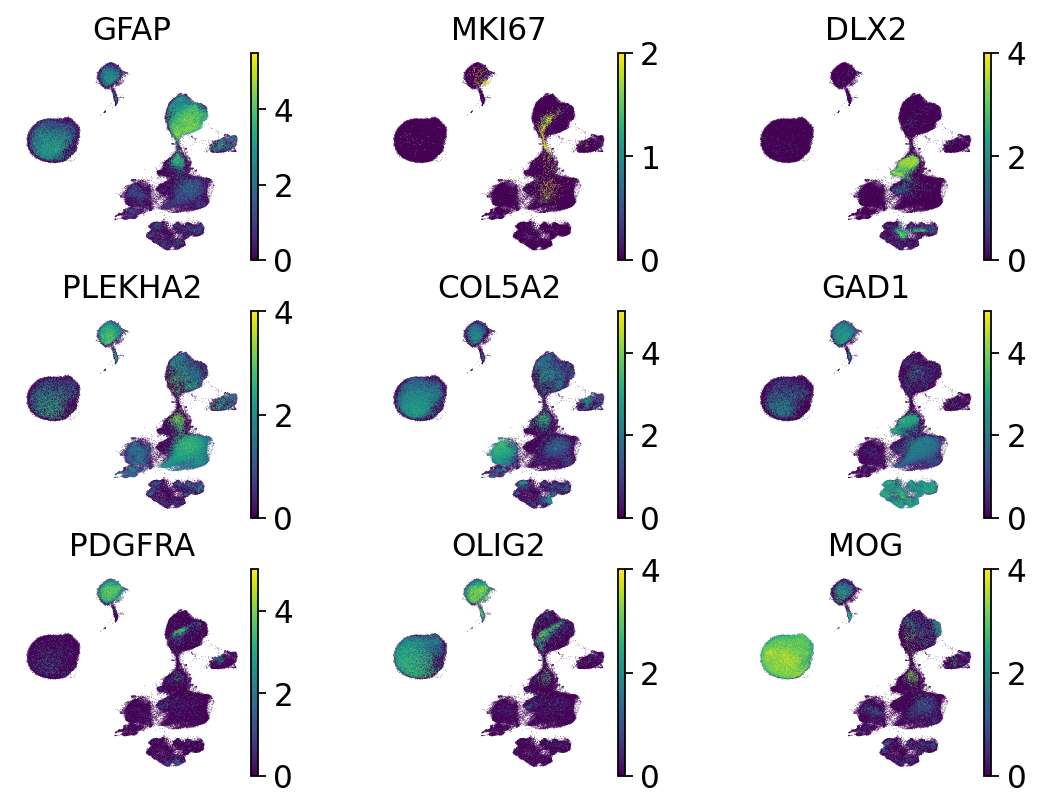

In [16]:
figsize(1.8,1.8)
sc.pl.umap(ad, color=['GFAP','MKI67','DLX2','PLEKHA2','COL5A2','GAD1','PDGFRA','OLIG2','MOG'], ncols=3,
           vmax=[5.5,2,4,4,5,5,5,4,4],
           frameon=False,save='fig4_maker_umap1.pdf')

In [56]:
m={
'NPC':['MKI67','TOP2A'],#'HMGB2','ASCL1','EOMES','MSI1','NES','PAX6','RNF5','SOX2'],
#'Radial glial cells':['PAX6','SOX2'],#'FABP7','HES5','NES','VIM'],
'Neuroblasts':['DLX2','SOX11'],#'CALB2','NEUROD6','DPYSL3'],#'SOX4','SEZ6','RBFOX3','NEUROD4','EOMES','TUBB3'],
#'Immature neurons':['STMN1','TUBB3','PCDH9','NCAM1'],
#'Neuron': ['SLC17A7','NRP1'],#'ERC2'],
 'Glutamatergic': ['PROX1','PLEKHA2'],# 'RBFOX3','CPLX2','GRIA1'],
'Neuron': ['SLC17A7','COL5A2'],#'NRP1','SYN3', 'PDLIM5', 'GRIK1', 'PROX1', 'SEMA3E', 'COL5A2', 'SGCZ', 'ACVR1C', 'GRM3', 'SYT13', 'ROBO1'],
'GABAergic': ['GAD1','GAD2'],#'GABBR2','SLC32A1'],
    
'Astro': ['GFAP', 'AQP4'],
 'Endothelial': ['FLT1','ENG'],
# 'Microglia': ['P2RY12', 'PTPRC'],
'OPC': ['PDGFRA','OLIG1'],
 'NFOL': ['OLIG2','SOX10'],
 'Oligo': ['MOG','MAG'],#'MBP'],
 }

In [ ]:
sc.set_figure_params(scanpy=True, fontsize=14)

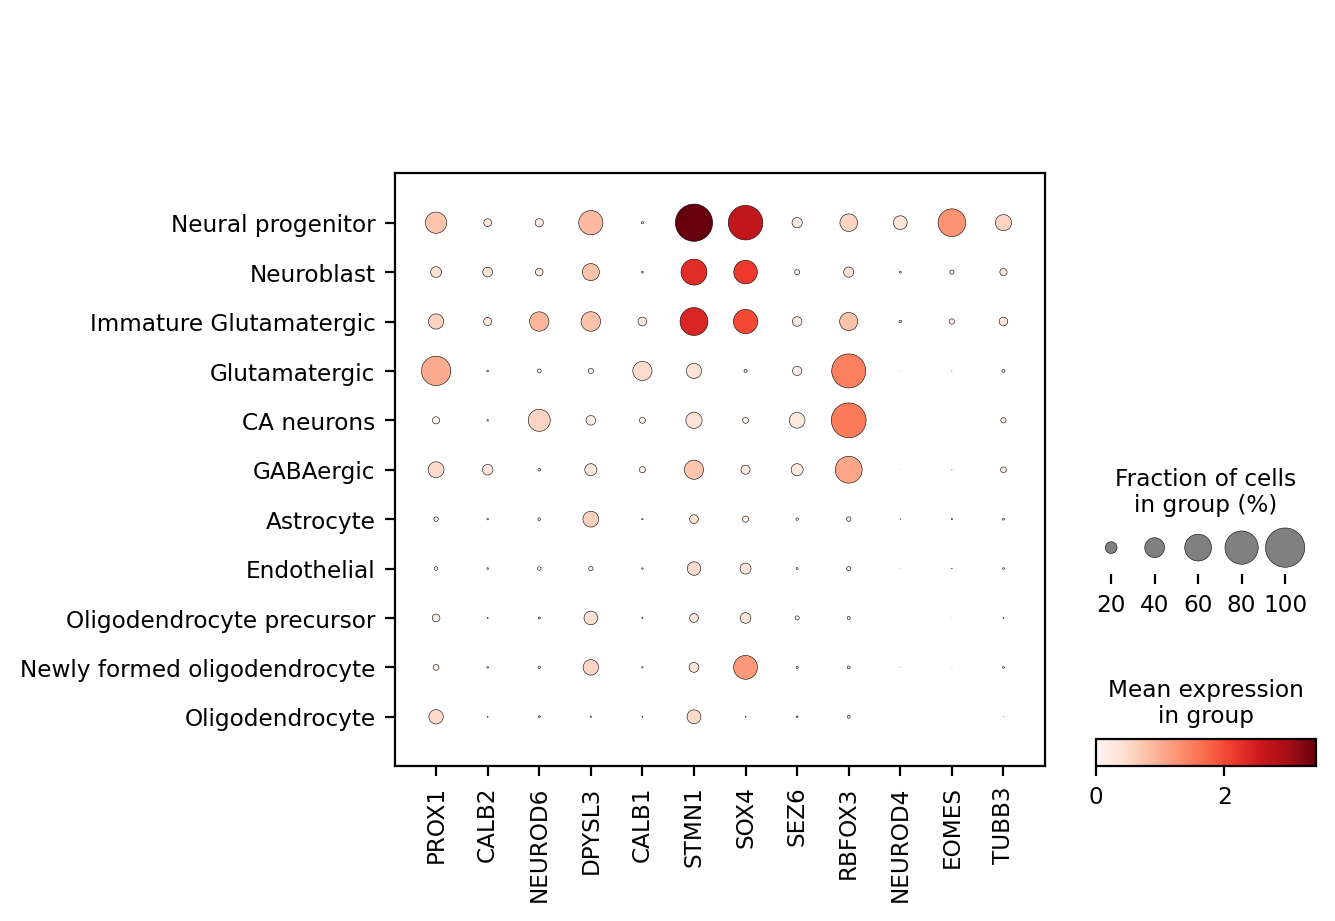

In [ ]:
my_list = ["PROX1", "DCX", "CALB2", "NEUROD6", "DPYSL3", "CALB1", "STMN1",'SOX4','SEZ6','RBFOX3','NEUROD4','EOMES','TUBB3','NNAT']
sc.pl.dotplot(ad,[i for i in my_list if i in ad.var_names],'anno1')

In [ ]:
PROX1/DCX/CALB2/NEUROD6/DPYSL3/CALB1/STMN1

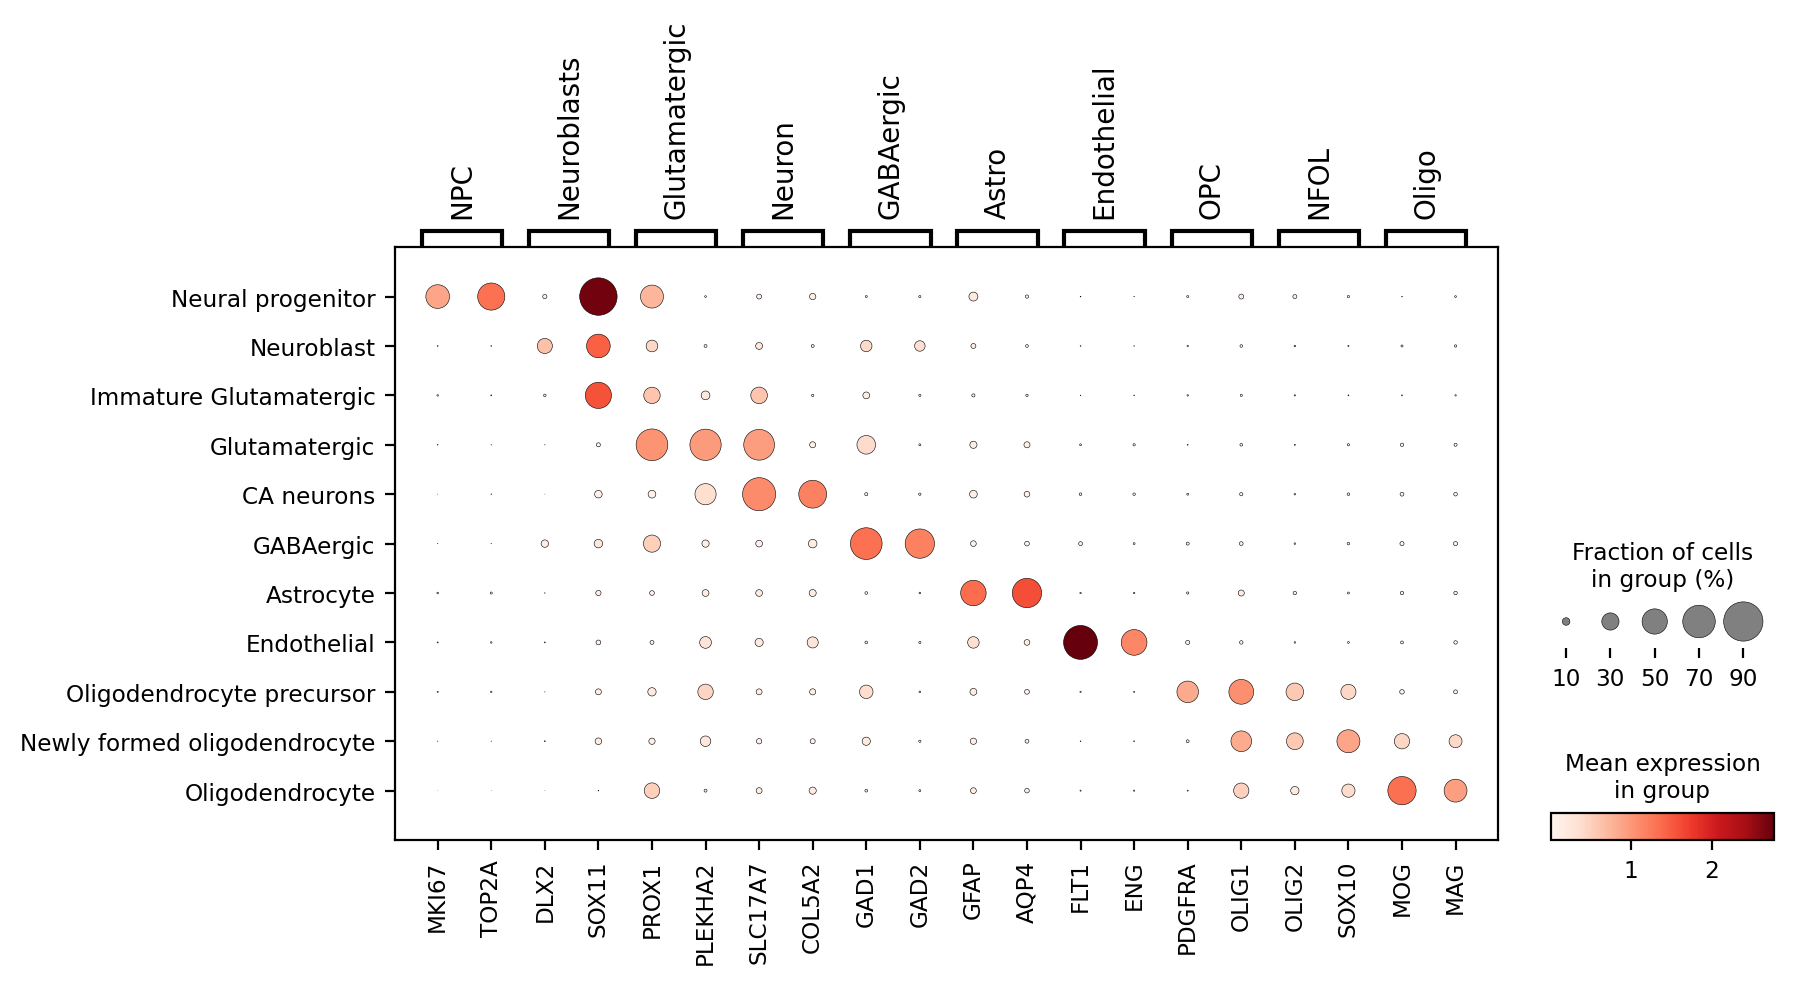

In [ ]:
sc.pl.dotplot(ad,m,'anno1',save='fig4_marker_dotplot.pdf')

In [67]:
sc.set_figure_params(scanpy=True, fontsize=16,facecolor=None,frameon=False,transparent=True)
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.grid'] = False

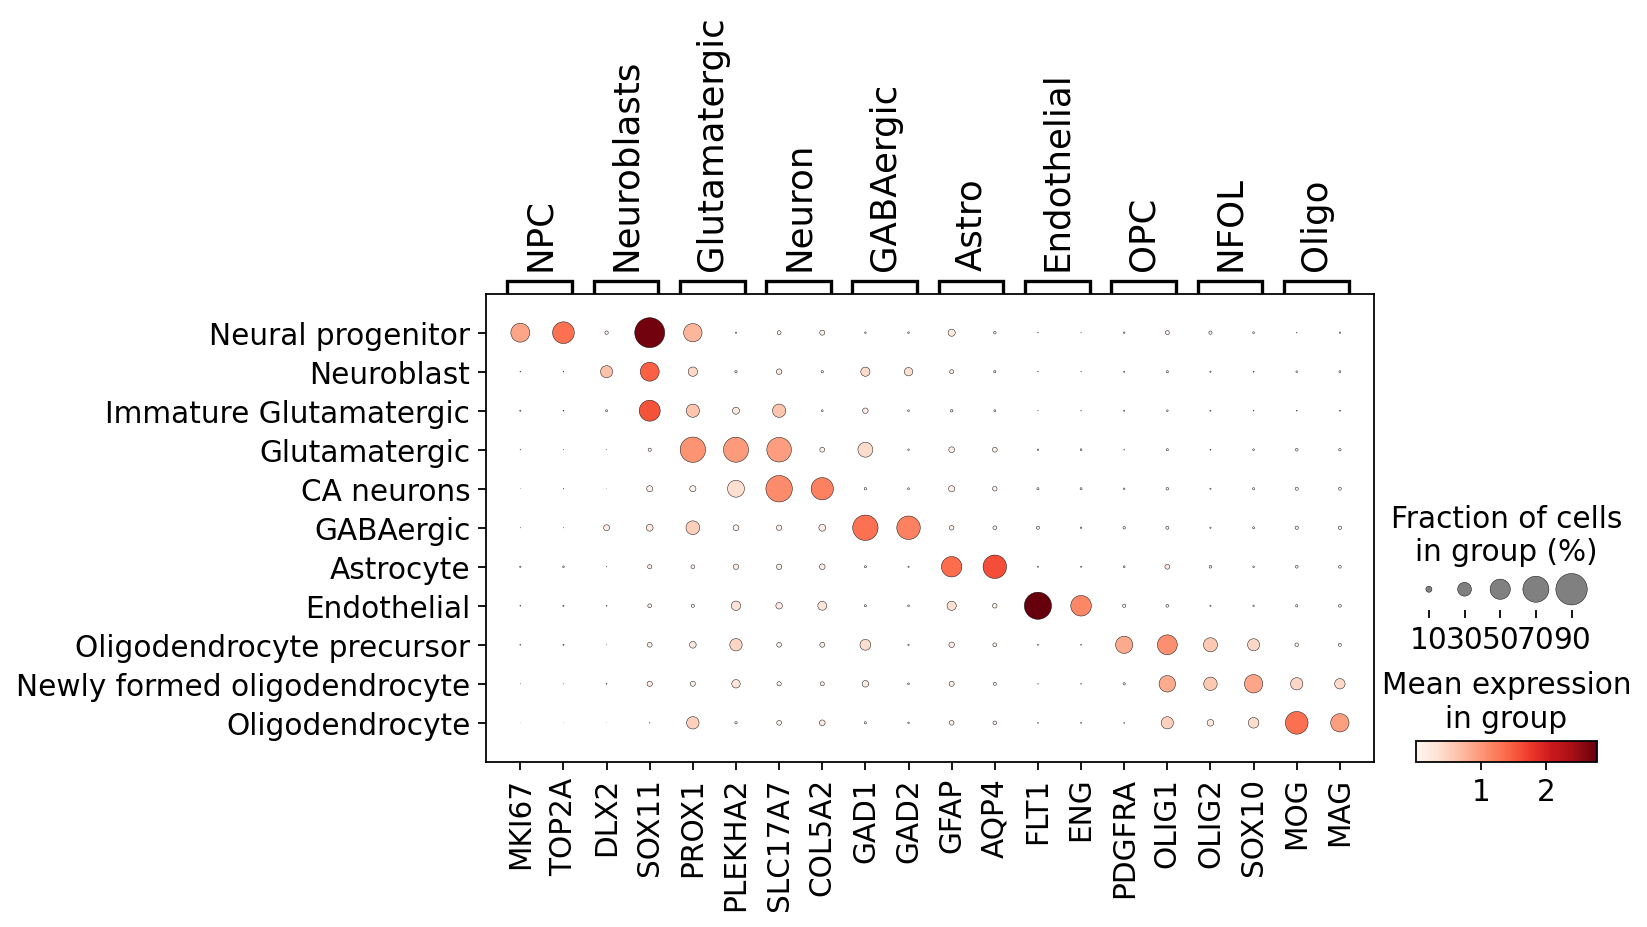

In [68]:
figsize(3,2)
sc.pl.dotplot(ad,m,'anno1',save='fig4_marker_dotplot.pdf')

In [75]:
#| export

def plot_violins(ad, genes, groupby='leiden',ncols=5, figsize=(20, 4)):
    """
    Plots violin plots for a list of genes in a specified cluster.

    Parameters:
    ad (AnnData): AnnData object containing the scRNA-seq data.
    genes (list): List of genes to plot.
    groupby (str): Metadata column to group the cells by (default is 'leiden').
    figsize (tuple): Size of the figure (default is (20, 4)).

    Returns:
    None
    """
    # Calculate the number of rows and columns for the subplots
    n_cols = ncols if len(genes) >= ncols else len(genes)
    n_rows = math.ceil(len(genes) / n_cols)

    # Create the figure and axes for the subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1] * n_rows))
    
    # Iterate over the genes and plot the violin plots
    for i, gene in enumerate(genes):
        # Calculate the row and column indices for the current subplot
        row = i // n_cols
        col = i % n_cols

        # Plot the violin plot for the current gene
        sc.pl.violin(ad, gene, groupby, ax=axs[row, col], show=False, rotation=90)
        
        # Set the title for the current subplot
        axs[row, col].set_title(gene)
        axs[row, col].spines['right'].set_visible(False)
        axs[row, col].spines['top'].set_visible(False)

        # Add x-axis label to the bottom row of subplots
        if row == n_rows - 1:
            axs[row, col].set_xlabel(groupby)

        # Add y-axis label to the leftmost column of subplots
        if col == 0:
            axs[row, col].set_ylabel('Gene expression')

    # Adjust the spacing between subplots and display the plot
    plt.tight_layout()
    plt.show()

# Cross-species conserved NPC markers
- Mapping human adult hippocampal neurogenesis with single-cell transcriptomics: Reconciling controversy or fueling the debate?

In [22]:
genes=['TOP2A','HMGB2','PBK','UBE2C','RRM2','CDCA3','CCNA2','FAM64A','TPX2']
genes = [i for i in genes if i in ad.var_names]

In [23]:
genes

['TOP2A', 'HMGB2', 'PBK', 'UBE2C', 'RRM2', 'CDCA3', 'CCNA2', 'TPX2']

In [289]:
ad1=sc.AnnData(X=ad.X, obs=ad.obs,var=ad.var)

## violin plots

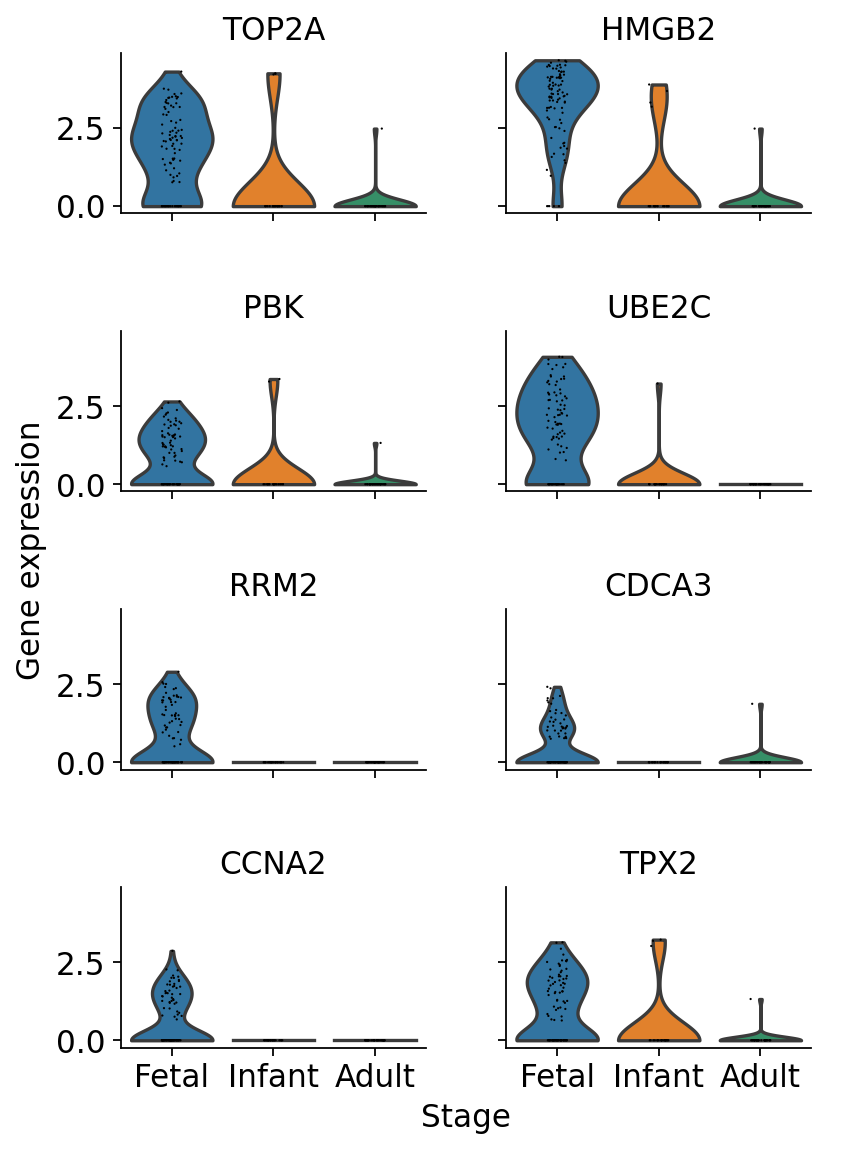

In [292]:
plot_violins(ad1[(ad1.obs.study!='Hochgerner et al.') & (ad1.obs.stage!='Child') & (ad1.obs.anno=='NPC')].copy(),genes,'stage',ncols=2,figsize=[6,2])
plt.savefig('figures/fig4/marker_gene_exp.pdf')

## dotplot

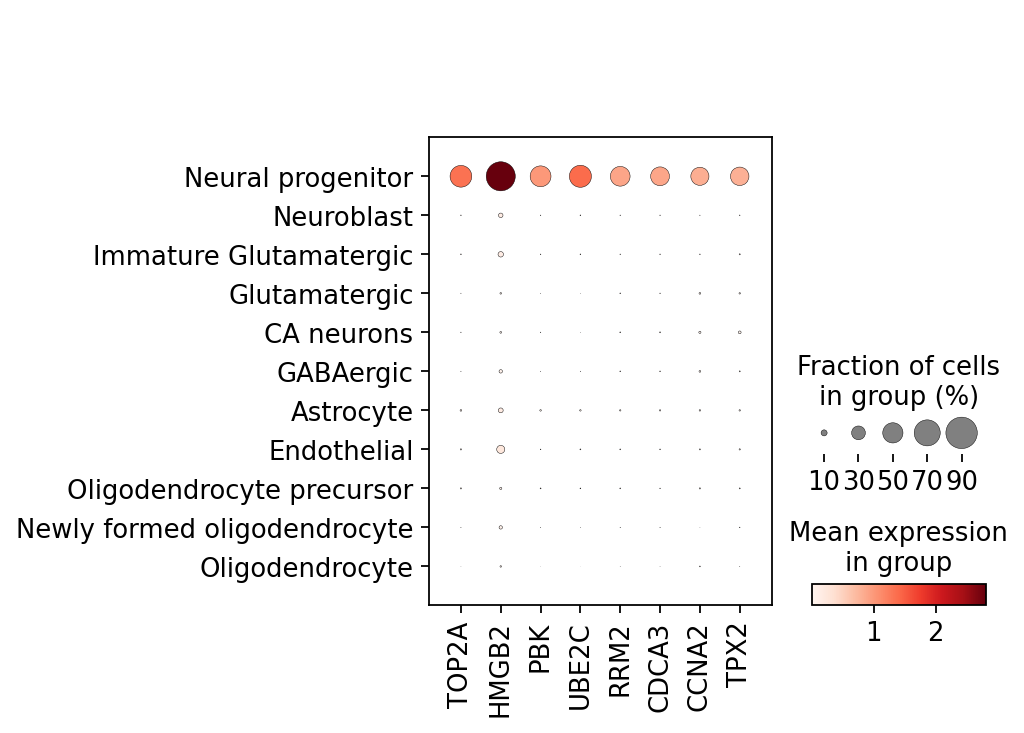

In [24]:
sc.pl.dotplot(ad,genes,'anno1',save='ext1b.pdf')

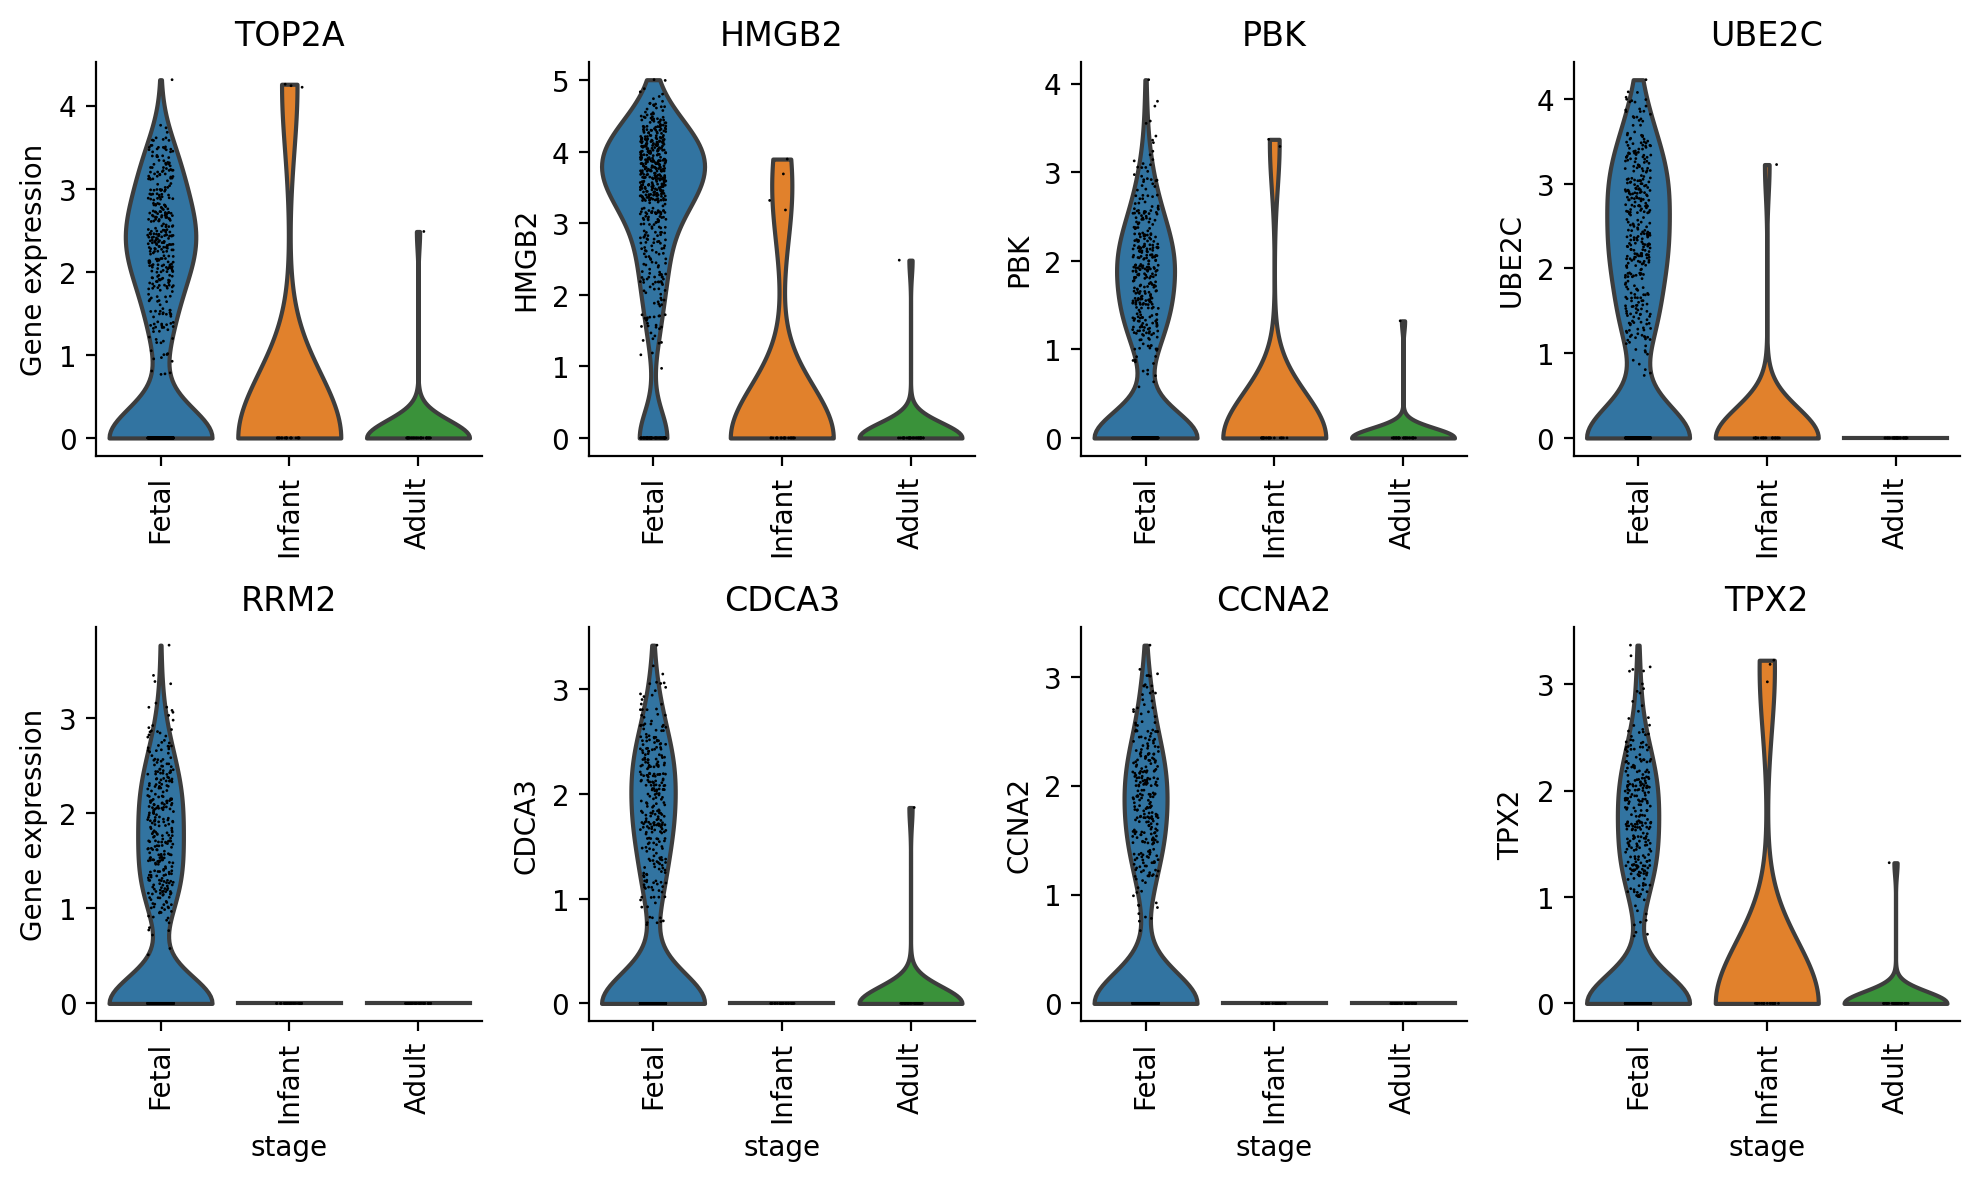

<Figure size 500x500 with 0 Axes>

In [ ]:
plot_violins(ad[(ad.obs.stage!='Child') & (ad.obs.anno=='NPC')],genes,'stage',ncols=4,figsize=[10,3])
plt.savefig('figures/fig4/marker_gene_exp1.pdf')

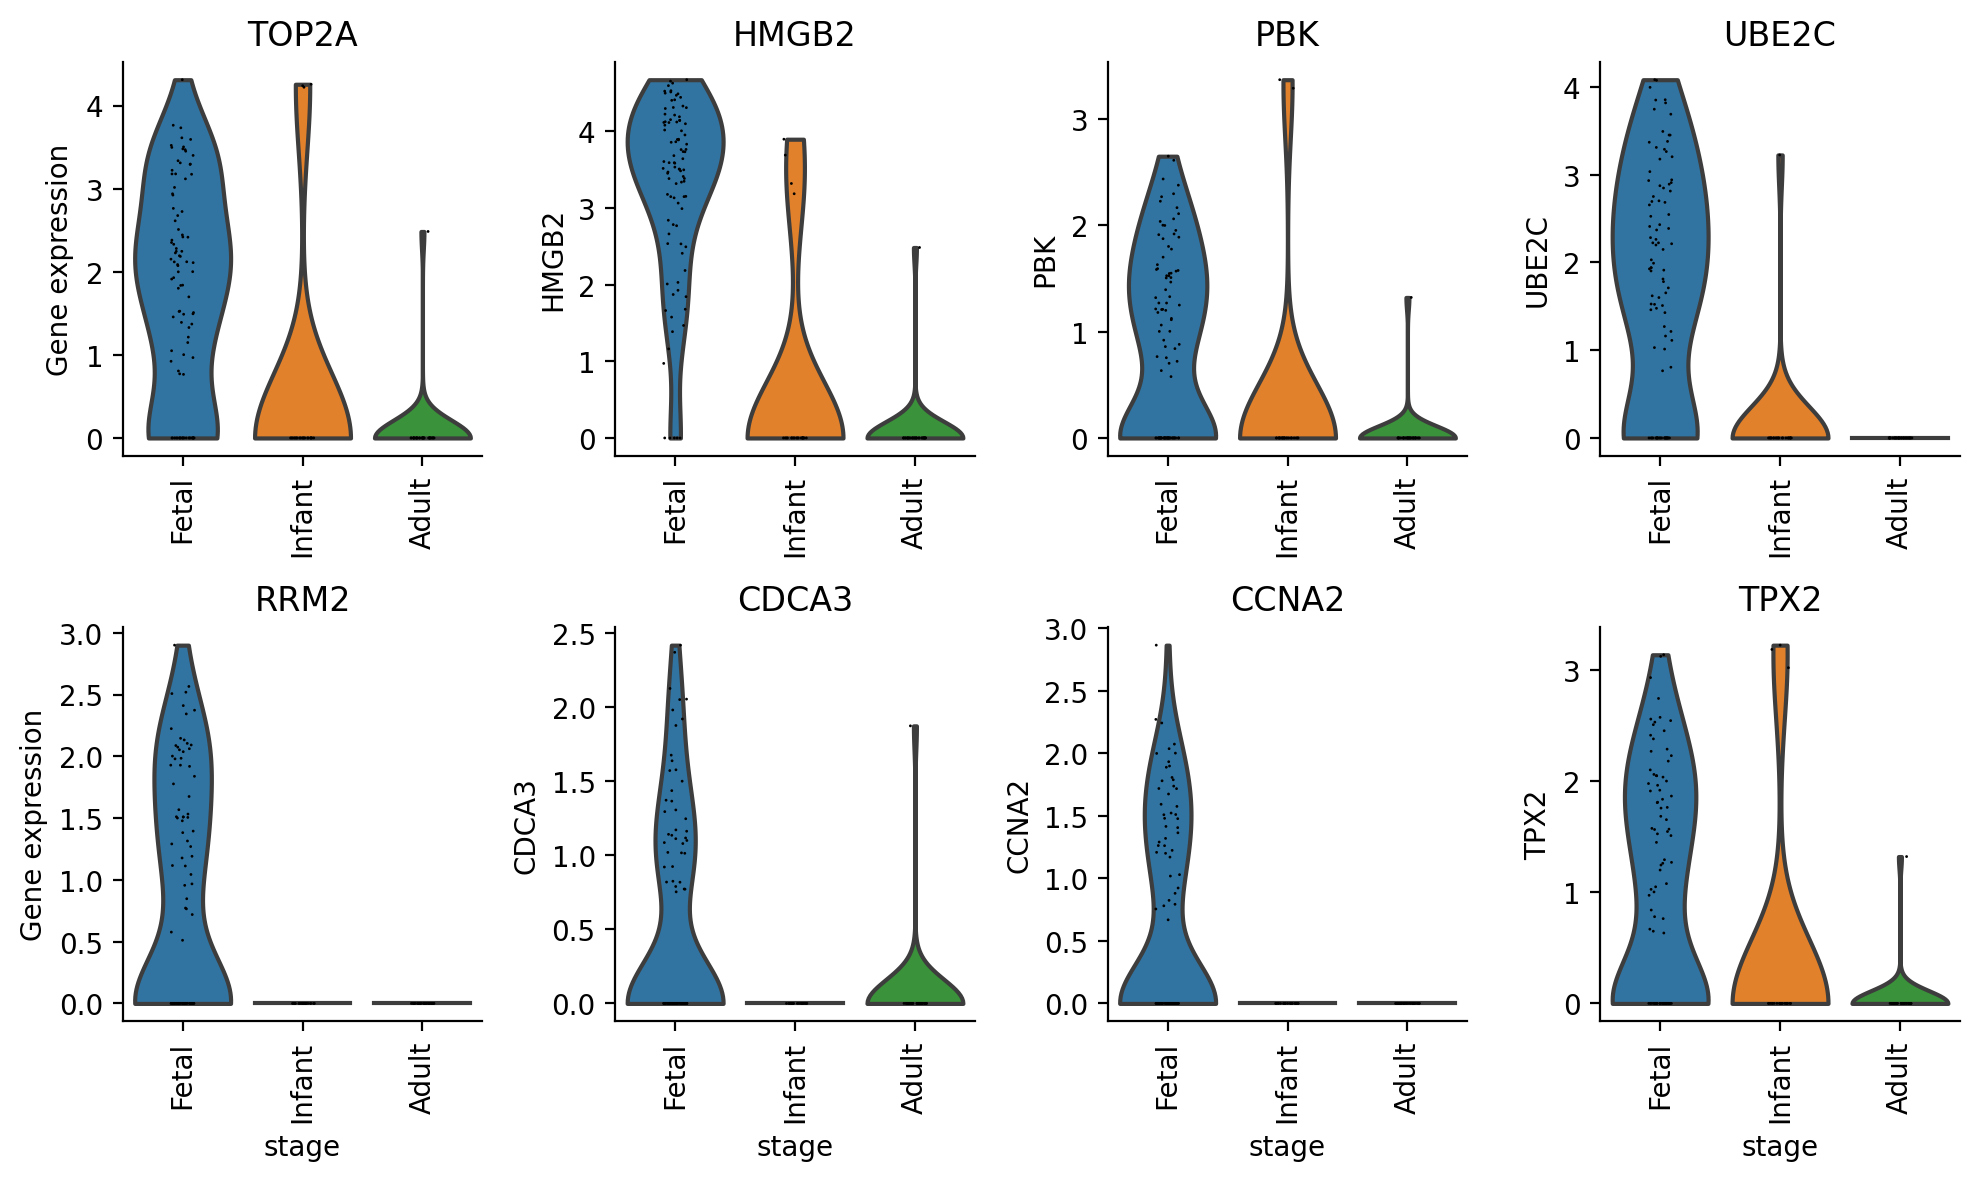

<Figure size 500x500 with 0 Axes>

In [ ]:
plot_violins(ad[(ad.obs.org!='mouse') & (ad.obs.stage!='Child') & (ad.obs.anno=='NPC')],genes,'stage',ncols=4,figsize=[10,3])
plt.savefig('figures/fig4/marker_gene_exp2.pdf')

# NPC gene module scores

In [ ]:
gs=(ad[:,genes].X>0).todense()

In [ ]:
gs=pd.DataFrame(gs.astype(int))

In [ ]:
gs.columns=['exp_'+g for g in genes]

In [ ]:
gs.index=ad.obs_names

In [ ]:
gs['exp_Total']=gs.sum(axis=1)

In [ ]:
gs=pd.concat([gs, ad.obs], axis=1)

In [ ]:
gs

exp_TOP2A  exp_HMGB2  exp_PBK  exp_UBE2C  \
P57_AAAGTAGGTCCAGTAT-0-0-0           0          0        0          0   
P57_AACCATGGTAAACACA-0-0-0           0          0        0          0   
P57_AACGTTGCACTTAACG-0-0-0           0          0        0          0   
P57_AACTCTTCATACTCTT-0-0-0           0          0        0          0   
P57_AACTTTCAGAGACTTA-0-0-0           0          0        0          0   
...                                ...        ...      ...        ...   
10X82_1_CGTCAGTTTGACAC--7-1          0          0        0          0   
10X82_1_AGGCCAGCCACGCT--7-1          0          0        0          0   
10X82_1_GCAGTCAGTCACTA--7-1          0          1        0          0   
10X82_1_CTCGTAGTGGGCTA--7-1          0          0        0          0   
10X82_1_AGATCTCGTTACAG--7-1          0          1        0          0   

                             exp_RRM2  exp_CDCA3  exp_CCNA2  exp_TPX2  \
P57_AAAGTAGGTCCAGTAT-0-0-0          0          0          0         0   
P57_AACCATGGTAAACACA-0-0-0          0          0          0         0   
P57_AACGTTGCACTTAACG-0-0-0          0          0          0         0   
P57_AACTCTTCATACTCTT-0-0-0          0          0          0         0   
P57_AACTTTCAGAGACTTA-0-0-0          0          0          0         0   
...                               ...        ...        ...       ...   
10X82_1_CGTCAGTTTGACAC--7-1         0          0          0         0   
10X82_1_AGGCCAGCCACGCT--7-1         0          0          0         0   
10X82_1_GCAGTCAGTCACTA--7-1         0          0          0         0   
10X82_1_CTCGTAGTGGGCTA--7-1         0          0          0         0   
10X82_1_AGATCTCGTTACAG--7-1         0          0          0         0   

                             exp_Total        sample  ...  remove  louvain  \
P57_AAAGTAGGTCCAGTAT-0-0-0           0           P57  ...    True        4   
P57_AACCATGGTAAACACA-0-0-0           0           P57  ...    True        2   
P57_AACGTTGCACTTAACG-0-0-0           0           P57  ...    True        2   
P57_AACTCTTCATACTCTT-0-0-0           0           P57  ...    True        2   
P57_AACTTTCAGAGACTTA-0-0-0           0           P57  ...    True        2   
...                                ...           ...  ...     ...      ...   
10X82_1_CGTCAGTTTGACAC--7-1          0  Unclassified  ...    True        8   
10X82_1_AGGCCAGCCACGCT--7-1          0  Unclassified  ...    True        7   
10X82_1_GCAGTCAGTCACTA--7-1          1  Unclassified  ...    True        7   
10X82_1_CTCGTAGTGGGCTA--7-1          0  Unclassified  ...    True        0   
10X82_1_AGATCTCGTTACAG--7-1          1  Unclassified  ...    True        7   

                             L01  L02  stage  score leiden2              anno  \
P57_AAAGTAGGTCCAGTAT-0-0-0     3    3  Adult  0.000       7        Neuroblast   
P57_AACCATGGTAAACACA-0-0-0     0    0  Adult  0.000       1  Oligodendrocytes   
P57_AACGTTGCACTTAACG-0-0-0     0    0  Adult  0.000       1  Oligodendrocytes   
P57_AACTCTTCATACTCTT-0-0-0     0    0  Adult  0.000       1  Oligodendrocytes   
P57_AACTTTCAGAGACTTA-0-0-0     0    0  Adult  0.000       5  Oligodendrocytes   
...                          ...  ...    ...    ...     ...               ...   
10X82_1_CGTCAGTTTGACAC--7-1    5    6  Fetal  0.000      12              GABA   
10X82_1_AGGCCAGCCACGCT--7-1    5    6  Fetal  0.000      14              GABA   
10X82_1_GCAGTCAGTCACTA--7-1    5    6  Fetal  0.125      14              GABA   
10X82_1_CTCGTAGTGGGCTA--7-1    1    1  Fetal  0.000      21           Granule   
10X82_1_AGATCTCGTTACAG--7-1    5    6  Fetal  0.125      14              GABA   

                                      study            anno1  
P57_AAAGTAGGTCCAGTAT-0-0-0        Fatma2020       Neuroblast  
P57_AACCATGGTAAACACA-0-0-0        Fatma2020  Oligodendrocyte  
P57_AACGTTGCACTTAACG-0-0-0        Fatma2020  Oligodendrocyte  
P57_AACTCTTCATACTCTT-0-0-0        Fatma2020  Oligodendrocyte  
P57_AACTTTCAGAGACTTA-0-0-0        Fatma2020  Oligo

In [ ]:
gs.group

P57_AAAGTAGGTCCAGTAT-0-0-0          Fatma2020
P57_AACCATGGTAAACACA-0-0-0          Fatma2020
P57_AACGTTGCACTTAACG-0-0-0          Fatma2020
P57_AACTCTTCATACTCTT-0-0-0          Fatma2020
P57_AACTTTCAGAGACTTA-0-0-0          Fatma2020
                                    ...      
10X82_1_CGTCAGTTTGACAC--7-1    Hochgerner2018
10X82_1_AGGCCAGCCACGCT--7-1    Hochgerner2018
10X82_1_GCAGTCAGTCACTA--7-1    Hochgerner2018
10X82_1_CTCGTAGTGGGCTA--7-1    Hochgerner2018
10X82_1_AGATCTCGTTACAG--7-1    Hochgerner2018
Name: group, Length: 371851, dtype: category
Categories (8, object): ['Hochgerner2018', 'Zhong2020', 'Infant_Yi2022', 'Child_Yi2022', 'Yi2022', 'Tran2021', 'Fatma2020', 'Franjic2021']

In [26]:
ad.obs['stage'][(ad.obs.study=='Hochgerner et al.') & ad.obs.donor_age.isin(['E16.5'])] = 'Fetal'
ad.obs['stage'][(ad.obs.study=='Hochgerner et al.') & ad.obs.donor_age.isin(['P0','P5'])] = 'Infant'
ad.obs['stage'][(ad.obs.study=='Hochgerner et al.') & ad.obs.donor_age.isin(['P18','P19','P23'])] = 'Child'
ad.obs['stage'][(ad.obs.study=='Hochgerner et al.') & ad.obs.donor_age.isin(['P120','P132'])] = 'Adult'

In [27]:
gs['stage']=ad.obs['stage']

In [28]:
gs['group']=gs.stage.astype(str)+'_'+gs.study.astype(str)
gs['group']=gs['group'].astype('category')

In [29]:
gs['group'].value_counts()

Adult_Franjic et al.        165767
Adult_Ayhan et al.           99540
Fetal_Zhong et al.           26604
Adult_Zhou et al.            24484
Child_Zhou et al.            15379
Infant_Zhou et al.           13867
Adult_Tran et al.             8459
Child_Hochgerner et al.       6581
Infant_Hochgerner et al.      5561
Adult_Hochgerner et al.       4830
Fetal_Hochgerner et al.        779
Name: group, dtype: int64

In [30]:
tmp=[]
for i in gs.group.cat.categories:
    tmp.append([(gs.exp_Total[gs.group==i]==1).sum(),(gs.exp_Total[gs.group==i]==2).sum(),(gs.exp_Total[gs.group==i]==3).sum(),(gs.exp_Total[gs.group==i]==4).sum(),
          (gs.exp_Total[gs.group==i]==5).sum(),(gs.exp_Total[gs.group==i]==6).sum(),(gs.exp_Total[gs.group==i]==7).sum(),(gs.exp_Total[gs.group==i]==8).sum()])

In [34]:
tmp=pd.DataFrame(tmp)

In [35]:
tmp.index=list(gs.group.cat.categories)
tmp.columns=list(range(1,9))

In [36]:
tmp.T

Adult_Ayhan et al.  Adult_Franjic et al.  Adult_Hochgerner et al.  \
1                1498                  9739                      229   
2                   8                   433                       23   
3                   2                    22                       16   
4                   0                     3                       13   
5                   0                     7                       15   
6                   0                     1                       19   
7                   0                     0                       13   
8                   0                     1                       13   

   Adult_Tran et al.  Adult_Zhou et al.  Child_Hochgerner et al.  \
1                598                505                      444   
2                 29                 28                       31   
3                  0                 11                       16   
4                  0                  4                       16   
5                  0                  1                       17   
6                  0                  1                       17   
7                  0                  0                       18   
8                  0                  0                       20   

   Child_Zhou et al.  Fetal_Hochgerner et al.  Fetal_Zhong et al.  \
1                337                      206                5143   
2                 17                       71                 439   
3                  4                       28                 101   
4                  1                       29                  78   
5                  0                       27                  68   
6                  0                       41                  92   
7                  0                       70                 114   
8                  0                       52                 131   

   Infant_Hochgerner et al.  Infant_Zhou et al.  
1                      1272                 449  
2                       253                  24  
3                       113                  13  
4                        94                   4  
5                        98                   1  
6                        99                   0  
7                       151                   0  
8                       111                   0

In [37]:
tmp1=tmp.div(tmp.sum(axis=1), axis=0)

In [38]:
tmp1['name']=list(tmp.index)

In [39]:
tmp1

1         2         3         4         5  \
Adult_Ayhan et al.        0.993369  0.005305  0.001326  0.000000  0.000000   
Adult_Franjic et al.      0.954243  0.042426  0.002156  0.000294  0.000686   
Adult_Hochgerner et al.   0.671554  0.067449  0.046921  0.038123  0.043988   
Adult_Tran et al.         0.953748  0.046252  0.000000  0.000000  0.000000   
Adult_Zhou et al.         0.918182  0.050909  0.020000  0.007273  0.001818   
Child_Hochgerner et al.   0.766839  0.053541  0.027634  0.027634  0.029361   
Child_Zhou et al.         0.938719  0.047354  0.011142  0.002786  0.000000   
Fetal_Hochgerner et al.   0.393130  0.135496  0.053435  0.055344  0.051527   
Fetal_Zhong et al.        0.834090  0.071197  0.016380  0.012650  0.011028   
Infant_Hochgerner et al.  0.580557  0.115472  0.051575  0.042903  0.044728   
Infant_Zhou et al.        0.914460  0.048880  0.026477  0.008147  0.002037   

                                 6         7         8  \
Adult_Ayhan et al.        0.000000  0.000000  0.000000   
Adult_Franjic et al.      0.000098  0.000000  0.000098   
Adult_Hochgerner et al.   0.055718  0.038123  0.038123   
Adult_Tran et al.         0.000000  0.000000  0.000000   
Adult_Zhou et al.         0.001818  0.000000  0.000000   
Child_Hochgerner et al.   0.029361  0.031088  0.034542   
Child_Zhou et al.         0.000000  0.000000  0.000000   
Fetal_Hochgerner et al.   0.078244  0.133588  0.099237   
Fetal_Zhong et al.        0.014921  0.018488  0.021246   
Infant_Hochgerner et al.  0.045185  0.068918  0.050662   
Infant_Zhou et al.        0.000000  0.000000  0.000000   

                                              name  
Adult_Ayhan et al.              Adult_Ayhan et al.  
Adult_Franjic et al.          Adult_Franjic et al.  
Adult_Hochgerner et al.    Adult_Hochgerner et al.  
Adult_Tran et al.                Adult_Tran et al.  
Adult_Zhou et al.                Adult_Zhou et al.  
Child_Hochgerner et al.    Child_Hochgerner et al.  
Child_Zhou et al.                Child_Zhou et al.  
Fetal_Hochgerner et al.    Fetal_Hochgerner et al.  
Fetal_Zhong et al.              Fetal_Zhong et al.  
Infant_Hochgerner et al.  Infant_Hochgerner et al.  
Infant_Zhou et al.              Infant_Zhou et al.

In [40]:
tmp2=tmp1.melt(id_vars='name',value_vars=list(range(1,9)),var_name='score',value_name='precentage')

In [41]:
tmp2['Stage'] = tmp2['name'].str.split('_').str[0]
tmp2['Study'] = tmp2['name'].str.split('_').str[1]

In [42]:
tmp2

name score  precentage   Stage              Study
0         Adult_Ayhan et al.     1    0.993369   Adult       Ayhan et al.
1       Adult_Franjic et al.     1    0.954243   Adult     Franjic et al.
2    Adult_Hochgerner et al.     1    0.671554   Adult  Hochgerner et al.
3          Adult_Tran et al.     1    0.953748   Adult        Tran et al.
4          Adult_Zhou et al.     1    0.918182   Adult        Zhou et al.
..                       ...   ...         ...     ...                ...
83         Child_Zhou et al.     8    0.000000   Child        Zhou et al.
84   Fetal_Hochgerner et al.     8    0.099237   Fetal  Hochgerner et al.
85        Fetal_Zhong et al.     8    0.021246   Fetal       Zhong et al.
86  Infant_Hochgerner et al.     8    0.050662  Infant  Hochgerner et al.
87        Infant_Zhou et al.     8    0.000000  Infant        Zhou et al.

[88 rows x 5 columns]

In [43]:
tmp2['precentage']=tmp2['precentage']*100

In [44]:
tmp2['Study'] = tmp2['Study'].astype(pd.CategoricalDtype(['Hochgerner et al.', 'Zhong et al.', 'Zhou et al.', 'Tran et al.', 'Ayhan et al.', 'Franjic et al.'], ordered=True))

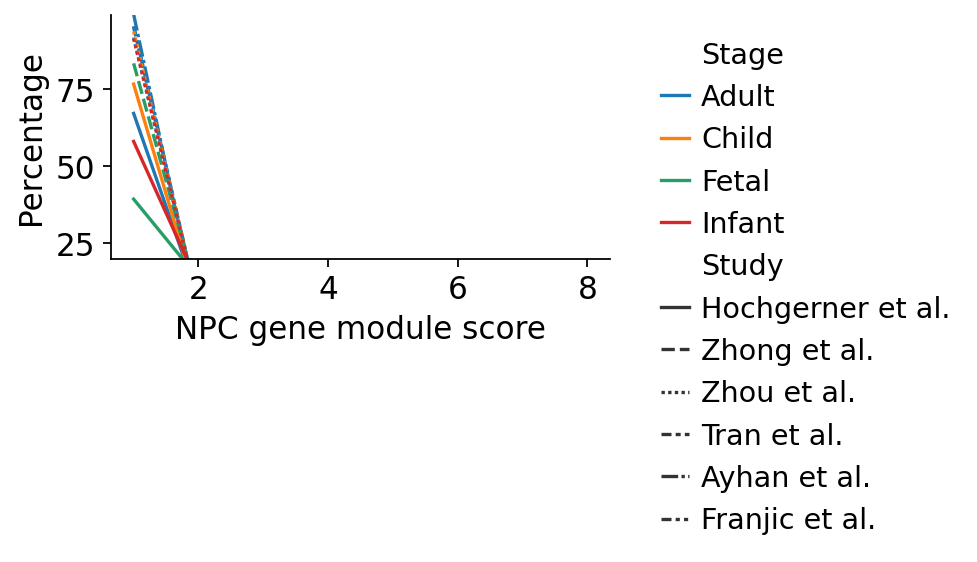

In [51]:
figsize(4,2)
sns.lineplot(x='score', y='precentage', hue='Stage',style='Study',data=tmp2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False,handlelength=1)
plt.grid(visible=False)
plt.ylabel('Percentage')
plt.xlabel('NPC gene module score')
plt.ylim(20,99)
plt.savefig('figures/fig4/NPC_scores_v0.pdf',dpi=300, bbox_inches='tight',transparent=True)

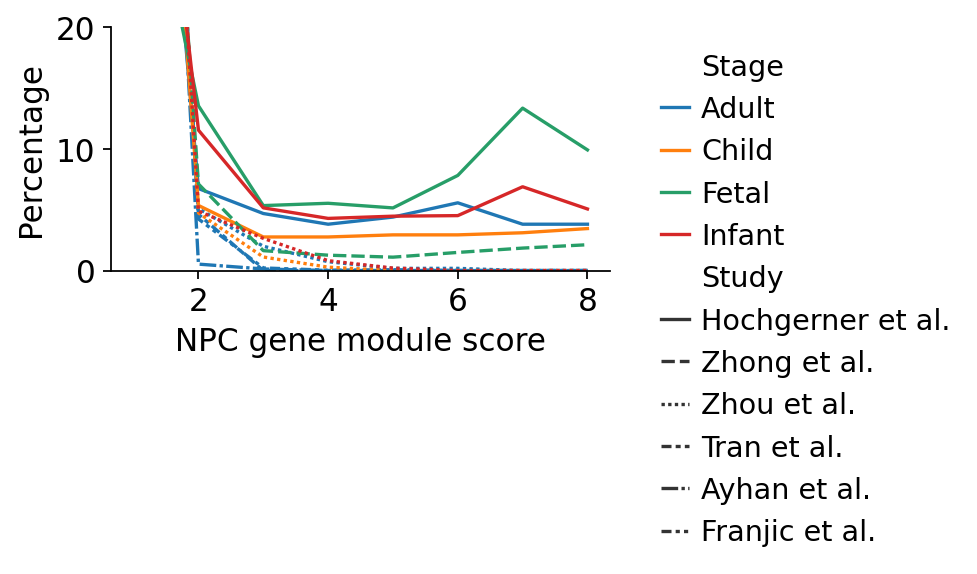

In [52]:
figsize(4,2)
sns.lineplot(x='score', y='precentage', hue='Stage',style='Study',data=tmp2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False,handlelength=1)
plt.grid(visible=False)
plt.ylabel('Percentage')
plt.xlabel('NPC gene module score')
plt.ylim(0,20)
plt.savefig('figures/fig4/NPC_scores_v1.pdf',dpi=300, bbox_inches='tight',transparent=True)

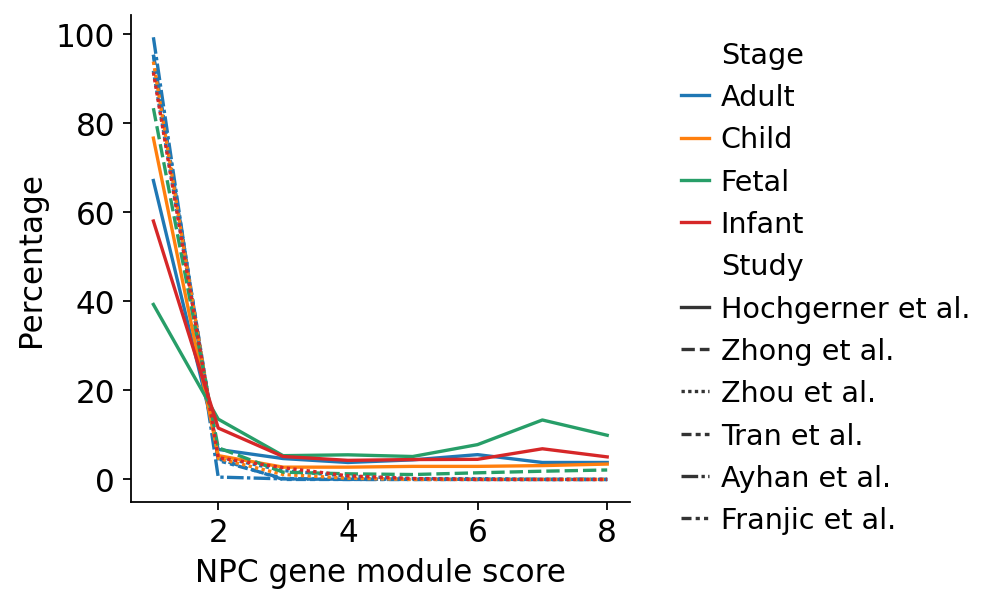

In [53]:
figsize(4,4)
sns.lineplot(x='score', y='precentage', hue='Stage',style='Study',data=tmp2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False,handlelength=1)
plt.grid(visible=False)
plt.ylabel('Percentage')
plt.xlabel('NPC gene module score')
#plt.ylim(0,20)
plt.savefig('figures/fig4/NPC_scores_v2.pdf',dpi=300, bbox_inches='tight',transparent=True)

## Distribution in annotated cell types

In [95]:
genes

['TOP2A', 'HMGB2', 'PBK', 'UBE2C', 'RRM2', 'CDCA3', 'CCNA2', 'TPX2']

In [96]:
dfs=[]
for i in genes:
    df=ad.obs.groupby(['anno1','exp_'+i]).size().unstack(fill_value=0)
    df.columns=['exp0','exp1']
    df['total']=df.sum(axis=1)
    df['perc']=df.exp1/df.total
    df['gene']=i
    dfs.append(df)

In [97]:
df1=pd.concat(dfs)

In [98]:
df1['celltype']=list(df1.index)

In [99]:
df1

exp0  exp1   total      perc   gene  \
anno1                                                                 
Neural progenitor                292   356     648  0.549383  TOP2A   
Neuroblast                     26965   142   27107  0.005238  TOP2A   
Immature Glutamatergic         21518   146   21664  0.006739  TOP2A   
Glutamatergic                  49942   116   50058  0.002317  TOP2A   
CA neurons                     20373    74   20447  0.003619  TOP2A   
...                              ...   ...     ...       ...    ...   
Astrocyte                      49007   722   49729  0.014519   TPX2   
Endothelial                     6235    79    6314  0.012512   TPX2   
Oligodendrocyte precursor      31891   302   32193  0.009381   TPX2   
Newly formed oligodendrocyte    1460     7    1467  0.004772   TPX2   
Oligodendrocyte               139448   237  139685  0.001697   TPX2   

                                                  celltype  
anno1                                                       
Neural progenitor                        Neural progenitor  
Neuroblast                                      Neuroblast  
Immature Glutamatergic              Immature Glutamatergic  
Glutamatergic                                Glutamatergic  
CA neurons                                      CA neurons  
...                                                    ...  
Astrocyte                                        Astrocyte  
Endothelial                                    Endothelial  
Oligodendrocyte precursor        Oligodendrocyte precursor  
Newly formed oligodendrocyte  Newly formed oligodendrocyte  
Oligodendrocyte                            Oligodendrocyte  

[88 rows x 6 columns]

In [100]:
df2=df1

In [101]:
df2['perc']=df2['perc']+0.001

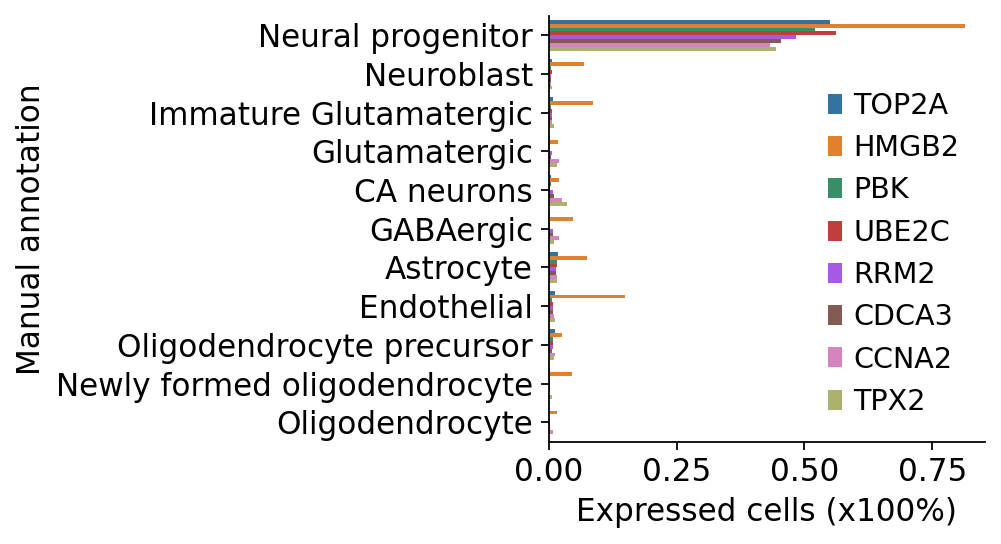

In [102]:
figsize(3.5,3.5)
sns.barplot(x='perc',y='celltype',hue='gene',data=df2)
sns.despine()
plt.ylabel('Manual annotation')
plt.xlabel('Expressed cells (x100%)')
plt.legend(frameon=False)
plt.savefig('figures/fig4/AHN_maker_dist.pdf',dpi=300, bbox_inches='tight',transparent=True)

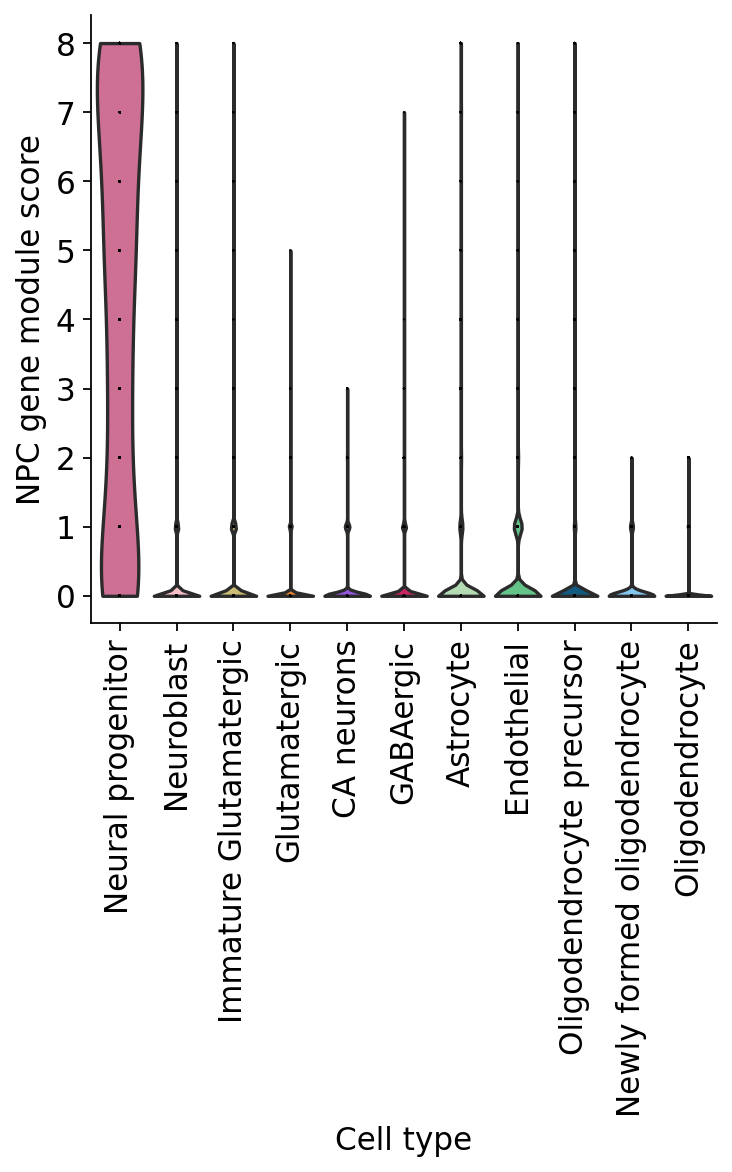

In [112]:
figsize(5,5)
sc.pl.violin(ad,'exp_Total',groupby='anno1',rotation=90,ylabel='NPC gene module score',xlabel='Cell type',save='NPC_score_dist.pdf',jitter=False)

# UMAP of NPC gene module socre

In [ ]:
ad.obs=gs

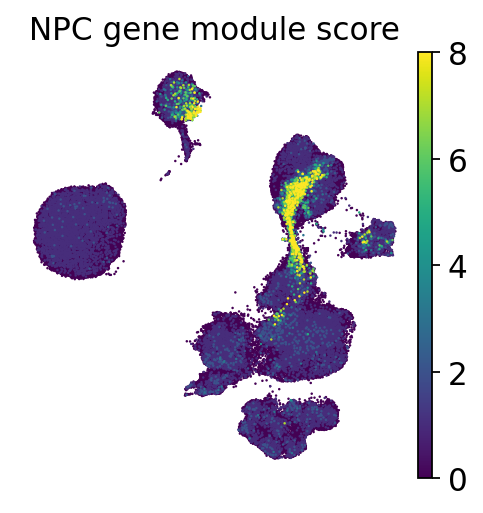

In [37]:
figsize(3.5,3.5)
sc.pl.umap(ad,color='exp_Total',vmax=8,size=5,title='NPC gene module score',frameon=False,save='exp_Total.pdf')

In [ ]:
gs.columns[:8]

Index(['exp_TOP2A', 'exp_HMGB2', 'exp_PBK', 'exp_UBE2C', 'exp_RRM2',
       'exp_CDCA3', 'exp_CCNA2', 'exp_TPX2'],
      dtype='object')

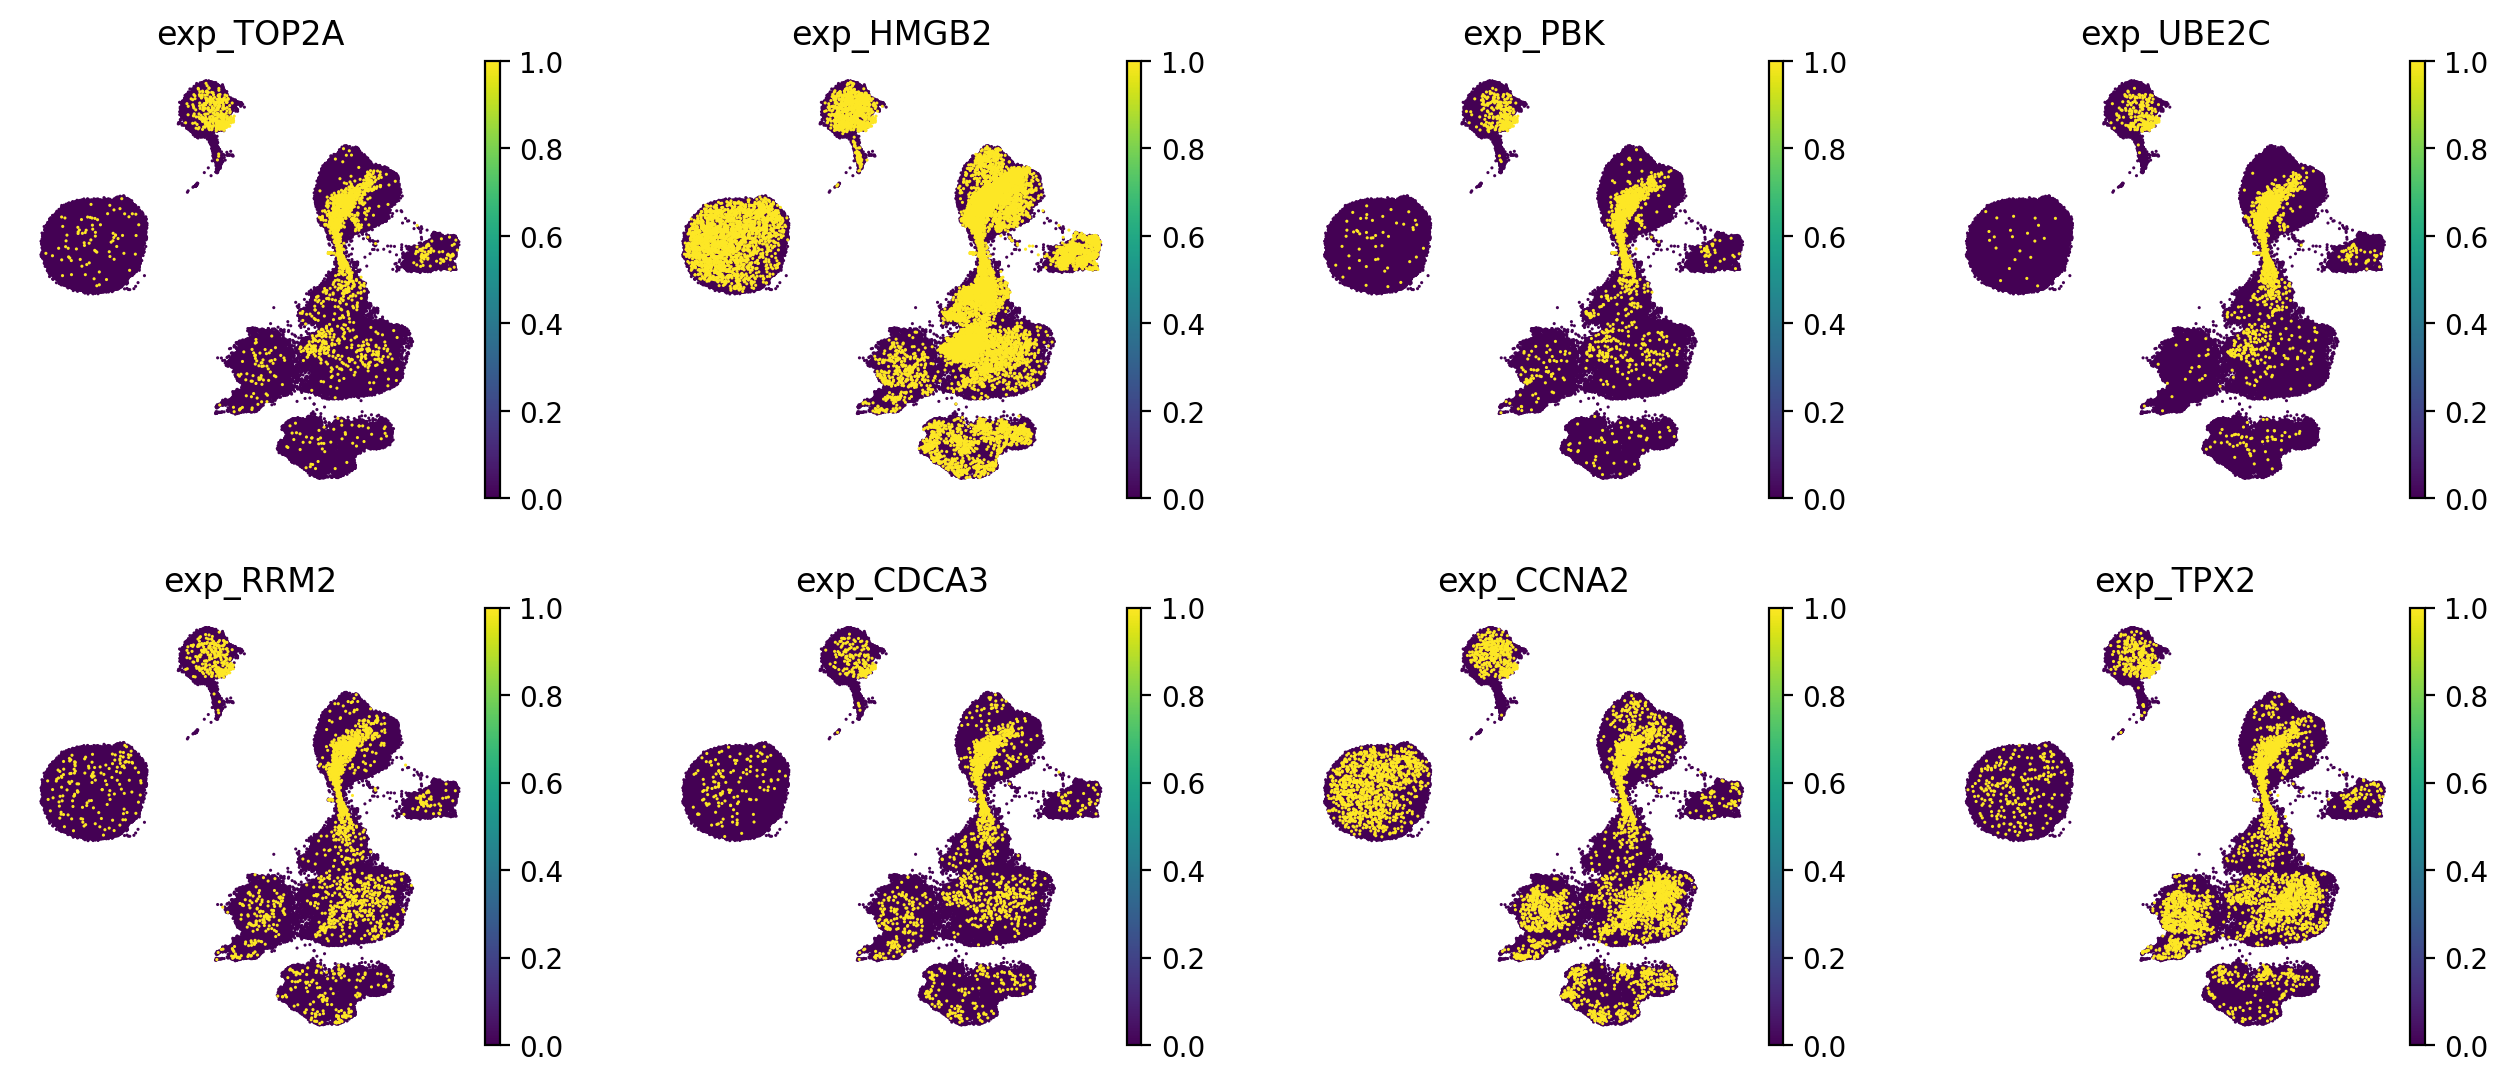

In [ ]:
figsize(3,3)
sc.pl.umap(ad,color=['exp_TOP2A', 'exp_HMGB2', 'exp_PBK', 'exp_UBE2C', 'exp_RRM2',
       'exp_CDCA3', 'exp_CCNA2', 'exp_TPX2'],ncols=4,size=5,frameon=False)

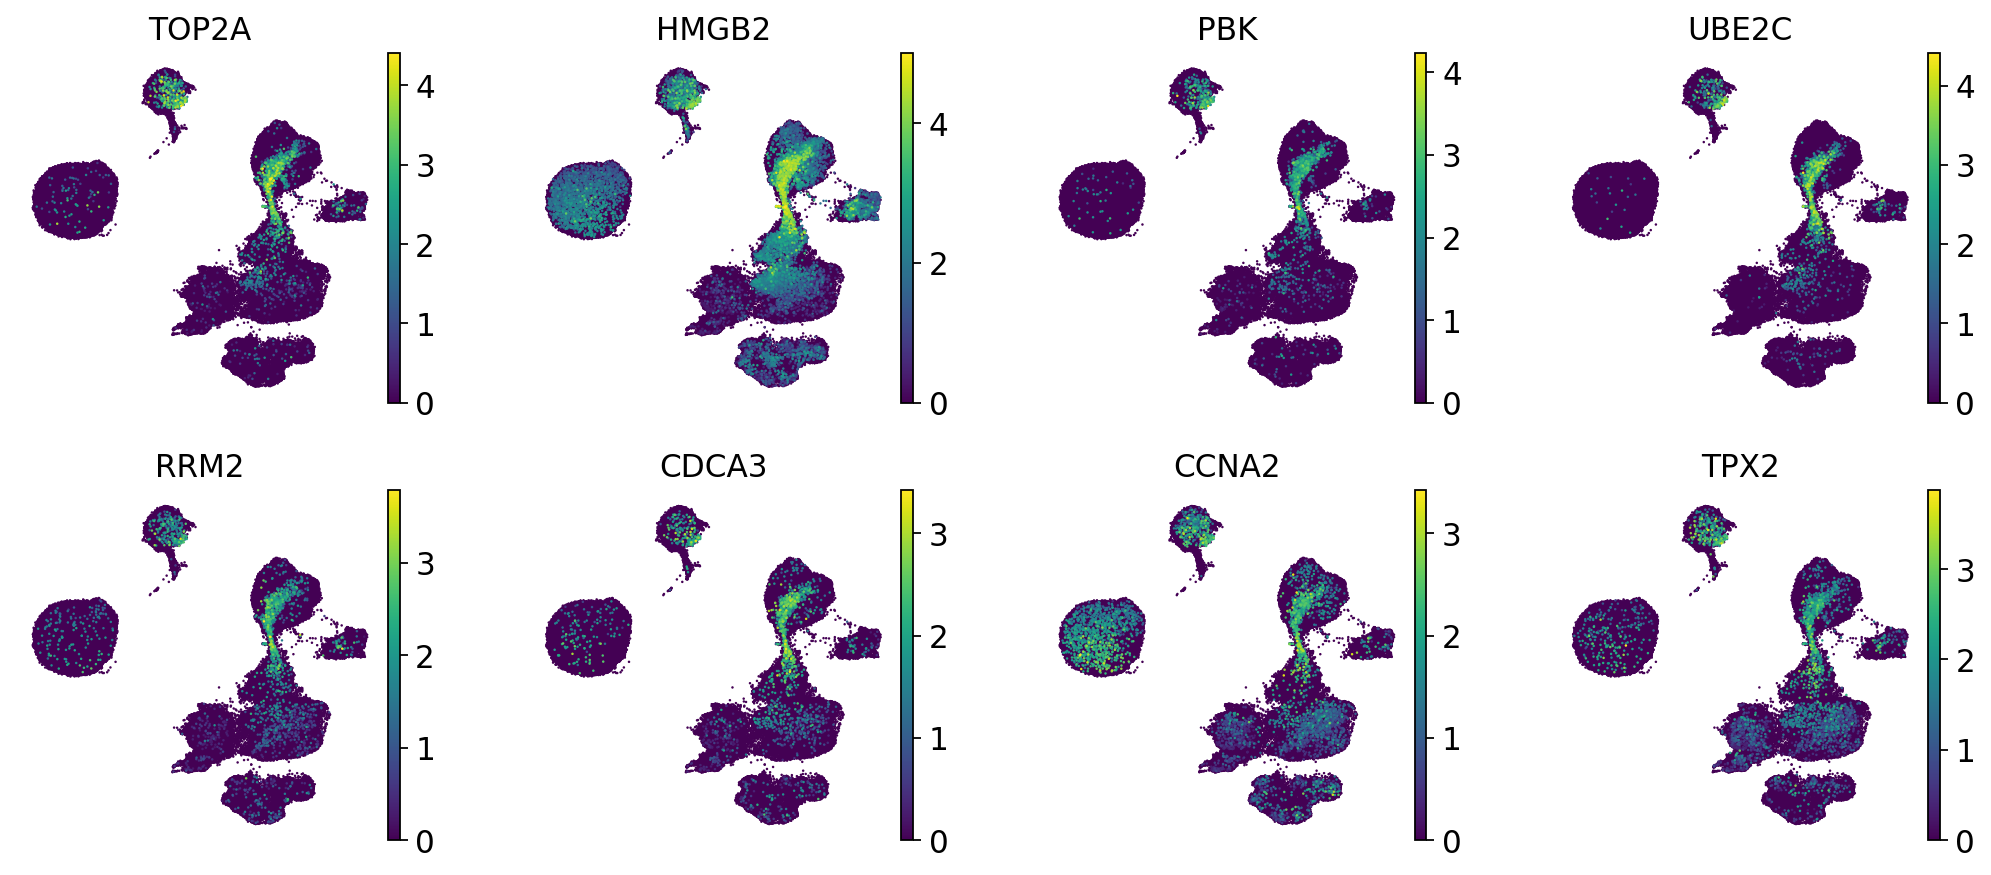

In [25]:
figsize(3,3)
sc.pl.umap(ad,color=genes,ncols=4,size=5,frameon=False,save='ext1a.pdf')

# DEGs

In [103]:
deg=pd.read_csv("data/hip_integration_npc_DEG.csv",index_col=0)

In [105]:
deg['gene']=list(deg.index)

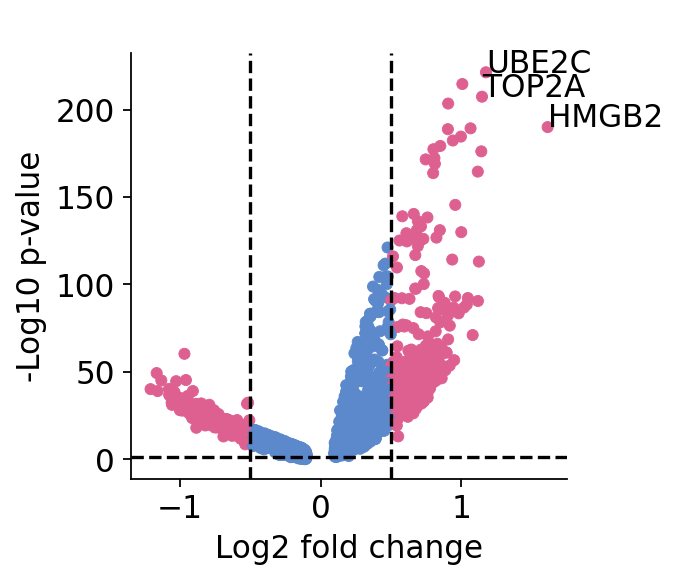

In [107]:
figsize(3.5,3.5)
enhanced_volcano(deg,lab = 'gene',
    selectLab = ['UBE2C', 'HMGB2', 'TOP2A'],
    x = 'avg_log2FC',
    y = 'p_val',FCcutoff =0.5,colors={"sig": "#DD6091", "not sig": "#5C89CC"},pointSize=25)
plt.savefig('figures/fig4/DEGs.pdf',dpi=300, bbox_inches='tight',transparent=True)

In [106]:
def enhanced_volcano(toptable, x, y, lab, pCutoff = 0.05, FCcutoff = 1, pointSize = 5, 
                     colors = {"sig": "red", "not sig": "blue"},selectLab = None,xlim = None):
    # Ensure x and y are numeric
    assert pd.api.types.is_numeric_dtype(toptable[x]), f"{x} is not numeric!"
    assert pd.api.types.is_numeric_dtype(toptable[y]), f"{y} is not numeric!"

    # Create a copy of the dataframe to avoid modifying the original one
    toptable = toptable.copy()
    
    # Add necessary columns to the dataframe
    toptable['Significance'] = np.where((abs(toptable[x]) > FCcutoff) & (toptable[y] < pCutoff), 'sig', 'not sig')
    toptable['-log10(p-value)'] = -np.log10(toptable[y])

    # Replace 0 p-values with a small number to avoid -inf
    toptable.loc[toptable[y] == 0, y] = 1e-10

    # Create the scatterplot
    sns.scatterplot(data = toptable, x = x, y = '-log10(p-value)', hue = 'Significance',palette = colors, s = pointSize,edgecolor=None)

    # Draw a vertical line at FCcutoff
    plt.axvline(x = FCcutoff, color = 'black', linestyle = '--')
    plt.axvline(x = -FCcutoff, color = 'black', linestyle = '--')

    # Draw a horizontal line at pCutoff
    plt.axhline(y = -np.log10(pCutoff), color = 'black', linestyle = '--')

    # Add labels to significant points
    if selectLab is not None:
        for i in range(toptable.shape[0]):
            if toptable[lab].iloc[i] in selectLab:
                plt.text(toptable[x].iloc[i], -np.log10(toptable[y].iloc[i]), toptable[lab].iloc[i])
    # Set x-axis limits
    if xlim is not None:
        plt.xlim(xlim)
        
    # Add title and labels
    plt.title(' ')
    plt.xlabel('Log2 fold change')
    plt.ylabel('-Log10 p-value')

    # Remove the legend
    plt.legend().remove()

    # Show the plot
    #plt.show()